### Covid19 EDA -1 상황분석 및 벤치마킹 국가 선정
* 데이터 출처 : https://github.com/owid/covid-19-data/blob/master/public/data/README.md

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
covid = pd.read_csv("./DATA/owid-covid-data.csv")

In [22]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


#### 변수 설명 (60개 변수) 

######  id 변수 : 지리 관련  변수, 날짜 
* iso_code : 국가 코드 
* continet: 대륙
* location : 지리적 위치 
* date : 2020년 2월 ~ 2021년 7월까지의 날짜 

##### 확진 관련 
* total_cases : 누적 확진자 수  
* new_cases: 해당 날짜의 신규 확진자 수 
* new_cases_smoothed : 7일간의 평균 확진자 수 
* total_cases_per_million : 누적 확진자 비율 (백만명당 확진자수)
* new_cases_per_million ; 신규 확진자 비율 (백만명당 확진자수)
* new_cases_per_millio : 7일간 평균 확진자 비율 (백만명당 확진자수)

##### 사망 관련 
* total_death : 누적 사망자 수 
* new_death : 해당 날짜의 신규 사망자 수 
* new_death_smoothed : 7일간의 평균 사망자 수 
* total_deaths_per_million : 누적 사망자 비율 (백만명당 사망자수)
* new_deaths_per_million ; 신규 사망자 비율 (백만명당 사망자수)
* new_deaths_per_million : 7일간 평균 사망자 비율 (백만명당 사망자수)

##### 입원 관련
* icu_patients
* icu_patients_per_milion
* hosp_patients
* hosp_patients_per_million
* weekly_icu_admissions
* weekly_icu_admissions_per_million
* weekly_hosp_admissions
* weekly_hosp_admissions_per_million

##### 검사 관련
* total_test
* new_test
* total_test_per_thousand
* new_test_per_thousand
* new_tests_smoothed
* new_tests_smoothed_per_thousand
* positive_rate : 검사 중 양성 반응이 나온 비율 (7일 평균)
* tests_per_case : 확진자 대비 검사비율 (7일 평균) 
* test_units

##### 백신 관련 
* total_vaccinations
* people_vaccinated
* people_fully_vaccinated
* new_vaccinations
* new_vaccinations_smoothed
* total_vaccinations_per_hundred
* people_fully_vaccinated_per_million

##### 국가별 지표
* 나머지 변수들 (인구, 인구밀도, 중위연령, gdp, 흡연자 수 등)

##### 기타
* stringency_index : 정부 대응 지수 
* reproduction_rate : 감염재생산 비율 추정치 





In [23]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [24]:
index = ['iso_code', 'continent', 'location', 'date']

case = ['total_cases', 'new_cases', 'new_cases_smoothed',
        'total_cases_per_million','new_cases_per_million', 
        'new_cases_smoothed_per_million','reproduction_rate']

death = ['total_deaths', 'new_deaths','new_deaths_smoothed',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million']

hosp = ['icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million' ]
 
tests = ['new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units']

vacc = ['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinatio1ns_smoothed_per_million']

country_index = ['stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'excess_mortality']

* country_info는 시계열 자료가 아니므로 따로 분할 
(stringency_index와 excess_morality는 시간에 따라 달라짐)

In [25]:
country_info = covid[index+country_index]

In [26]:
index = country_info["iso_code"].unique()
unique_values = pd.DataFrame(index = index, 
                             columns = country_index)
for i in index :
    for j in country_index :
        unique_values.loc[i,j] = len(country_info.loc[country_info["iso_code"] == i,j].unique())    

In [27]:
np.sum(unique_values == 1,axis=0)

stringency_index               50
population                    231
population_density            231
median_age                    231
aged_65_older                 231
aged_70_older                 231
gdp_per_capita                231
extreme_poverty               231
cardiovasc_death_rate         231
diabetes_prevalence           231
female_smokers                231
male_smokers                  231
handwashing_facilities        231
hospital_beds_per_thousand    231
life_expectancy               231
human_development_index       231
excess_mortality              141
dtype: int64

In [28]:
country_info.drop(["date","stringency_index","excess_mortality"],axis=1,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
country_info = country_info.drop_duplicates().set_index(["iso_code","location"]).sort_values(by="continent")

In [30]:
country_info.head()

,,continent,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,location,,,,,,,,,,,,,,,,
ZWE,Zimbabwe,Africa,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
STP,Sao Tome and Principe,Africa,219161.0,212.841,18.7,2.886,2.162,3052.714,32.3,270.113,2.42,NaN,NaN,41.340,2.9,70.39,0.625
CMR,Cameroon,Africa,26545864.0,50.885,18.8,3.165,1.919,3364.926,23.8,244.661,7.20,NaN,NaN,2.735,1.3,59.29,0.563
SHN,Saint Helena,Africa,6071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.56,NaN
CPV,Cape Verde,Africa,555988.0,135.580,25.7,4.460,3.437,6222.554,NaN,182.219,2.42,2.1,16.5,NaN,2.1,72.98,0.665


In [31]:
country_info.to_csv("country_info.csv",index=True)

* 나머지 시계열 데이터들은 전체 데이터,대륙별 데이터, 국가별 데이터로 분할 

In [32]:
# 국가 정보 데이터 제거 
exc = country_info.columns.difference(["continent"]) 
daily_covid = covid.drop(exc,axis=1)

In [33]:
# 시계열 시작, 종료일 확인
print("데이터 수집 시작일: {}".format(daily_covid.date.min()))
print("데이터 수집 종료일: {}".format(daily_covid.date.max()))
daily_covid.date

daily_covid['date'] = pd.to_datetime(daily_covid["date"])
daily_covid["date_month"] = daily_covid["date"].dt.strftime("%Y%m")
daily_covid.head()

데이터 수집 시작일: 2020-01-01
데이터 수집 종료일: 2021-07-22


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,excess_mortality,date_month
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,202002
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,202002
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,202002
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,202002
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,NaN,202002


In [34]:
# 전세계 / 대륙별 / 국가별 데이터로 분할 
world_covid = daily_covid[daily_covid["location"] == "World"].reset_index()
continents_covid = daily_covid[(daily_covid["continent"].isnull()) & 
                         (daily_covid["location"] != "World")].reset_index()
countrys_covid = daily_covid[daily_covid["continent"].isnull() == False].reset_index()

In [35]:
countrys_covid.drop(["index"],axis=1,inplace=True)

In [36]:
continents_covid.drop(["index"],axis=1,inplace=True)
world_covid.drop(["index"],axis=1,inplace=True)

### 현재 상황

#### 1-1 전세계 데이터 분석
* 일주일 주기가 있음

In [21]:
world_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,excess_mortality
0,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OWID_WRL,NaN,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OWID_WRL,NaN,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OWID_WRL,NaN,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OWID_WRL,NaN,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,OWID_WRL,NaN,World,2021-07-14,188356382.0,540168.0,468571.000,4058138.0,8695.0,8046.000,...,2.014807e+09,9.820912e+08,36670515.0,30658192.0,45.51,25.85,12.60,3933.0,NaN,NaN
540,OWID_WRL,NaN,World,2021-07-15,188925769.0,569387.0,481120.000,4066587.0,8449.0,7989.429,...,2.027692e+09,9.929779e+08,35324560.0,30169898.0,45.96,26.01,12.74,3871.0,NaN,NaN
541,OWID_WRL,NaN,World,2021-07-16,189525718.0,599949.0,494229.429,4075288.0,8701.0,8025.714,...,2.038338e+09,1.000651e+09,29819556.0,30630916.0,46.34,26.15,12.84,3930.0,NaN,NaN
542,OWID_WRL,NaN,World,2021-07-17,189998311.0,472593.0,503810.286,4082335.0,7047.0,8169.286,...,2.047585e+09,1.007615e+09,29337637.0,30991806.0,46.72,26.27,12.93,3976.0,NaN,NaN


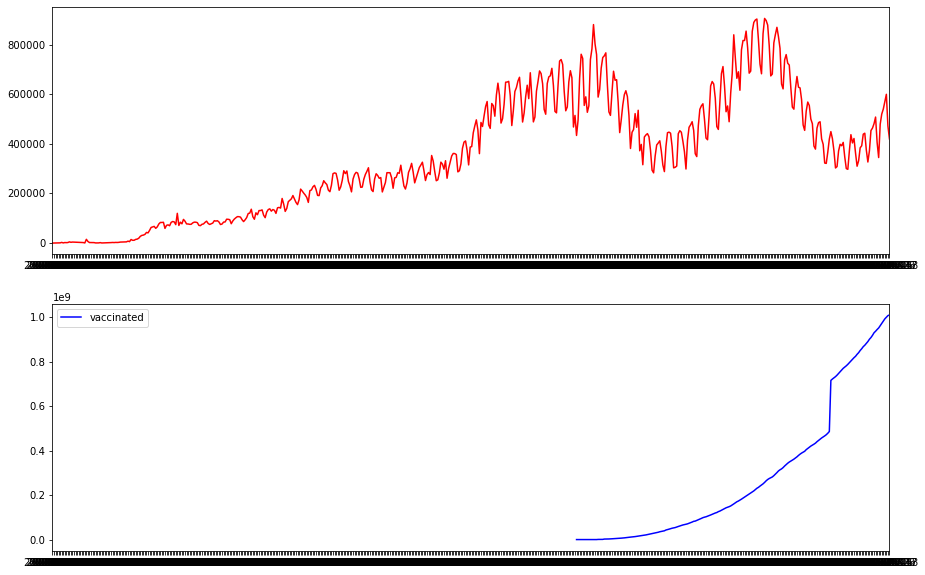

In [22]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)    #각각의 그래프에 subplot을 할당
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot_date(x = world_covid['date'],
              y = world_covid['new_cases'],
              color = 'red', 
              linestyle='-', 
              marker = None,
              label = 'case')
ax1.axis(xmin = min(world_covid['date']),      #같은 x축을 놓고 비교하기 위해 x축 설정 
         xmax = max(world_covid['date']))

ax2.plot_date(x = world_covid['date'],
              y = world_covid['people_fully_vaccinated'],
              color = 'blue', 
              linestyle='-', 
              marker = None,
              label = 'vaccinated')
ax2.axis(xmin = min(world_covid['date']),      #같은 x축을 놓고 비교하기 위해 x축 설정 
         xmax = max(world_covid['date']))

plt.legend()    #범례 지정

plt.show()

In [23]:
world_covid["date"] = pd.to_datetime(world_covid["date"])
daily = world_covid.set_index("date")

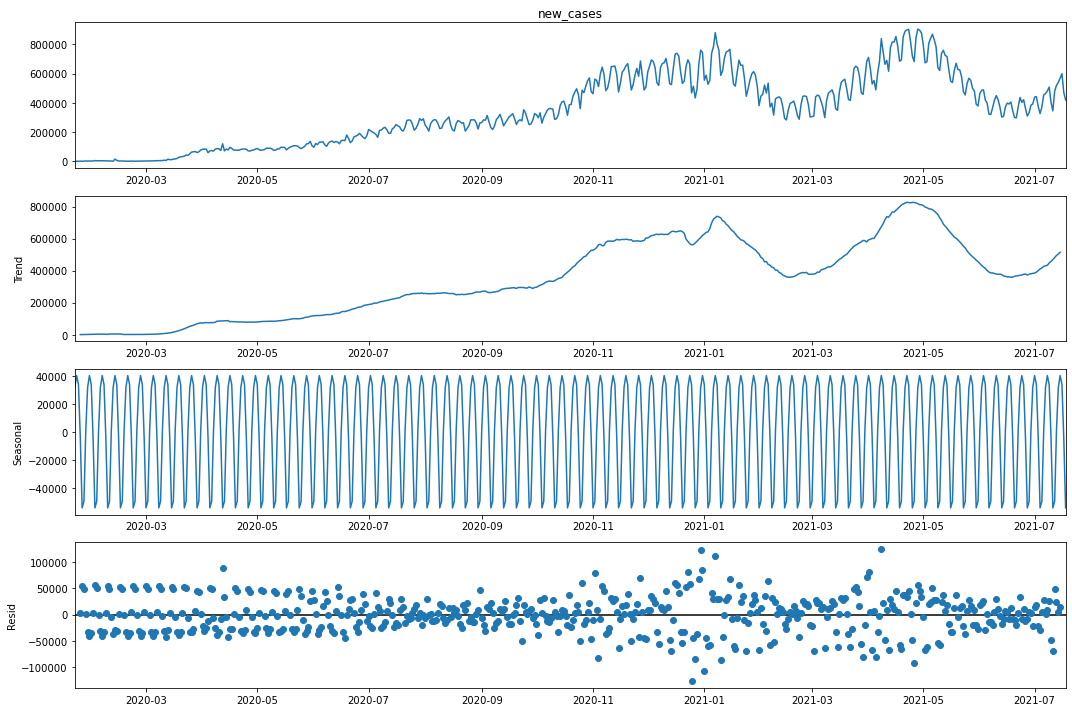

In [24]:
# 시계열 분해 
import statsmodels.api as sm
from scipy import stats

plt.rcParams['figure.figsize'] = (15,10)
sm.tsa.seasonal_decompose(daily["new_cases"],model='additive').plot()
plt.show()

In [25]:
result = sm.tsa.seasonal_decompose(daily["new_cases"],model='additive')
result.trend

date
2020-01-22              NaN
2020-01-23              NaN
2020-01-24              NaN
2020-01-25       717.285714
2020-01-26       801.428571
                  ...      
2021-07-14    503810.285714
2021-07-15    514520.428571
2021-07-16              NaN
2021-07-17              NaN
2021-07-18              NaN
Name: trend, Length: 544, dtype: float64

* 전세계 재생산 비율 : 코로나 19가 발생한 직후 시점인 20년 초반 3.0으로 최고치, 이후 꾸준히 감소세를 보이고 20년 4~5월부터는 1.0~ 1.25의 수치를 안정적으로 유지

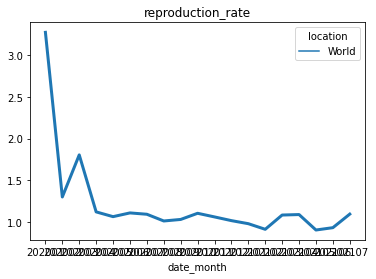

In [37]:
# 1. 전세계 재생산 비율
# 전세계
pivot_table_world_reproduction_rate = pd.pivot_table(world_covid, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_world_reproduction_rate = pivot_table_world_reproduction_rate.fillna(0)
#pv7 = pivot_table_world_reproduction_rate.iloc[422:]
sns.lineplot(data = pivot_table_world_reproduction_rate, ci = False, palette = "tab10", linewidth = 3,).set_title("reproduction_rate")
plt.show()

* 전세계 평균 확진자수 : 각각의 변이 바이러스들이 VOC로 지정된 시점인 20년 12월, 21년 1월, 4월에 급격히 증가
* 알파와 델타 바이러스의 근원지인 영국과 인도의 경우 각각 발생시점을 기점으로 신규 확진자가 수직적인 상승세

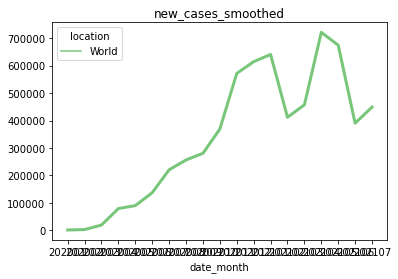

In [38]:
# 2. 전셰계 new_cases_smoothed(확진자)
pivot_table_world_new_cases_smoothed = pd.pivot_table(world_covid, index = "date_month", columns = "location", values = 'new_cases_smoothed', aggfunc = "mean")
pivot_table_world_new_cases_smoothed = pivot_table_world_new_cases_smoothed.fillna(0)
#pv7 = pivot_table_world_new_cases_smoothed.iloc[422:]

sns.lineplot(data = pivot_table_world_new_cases_smoothed, ci = False, palette = "YlGn", linewidth = 3,).set_title("new_cases_smoothed")
plt.show()

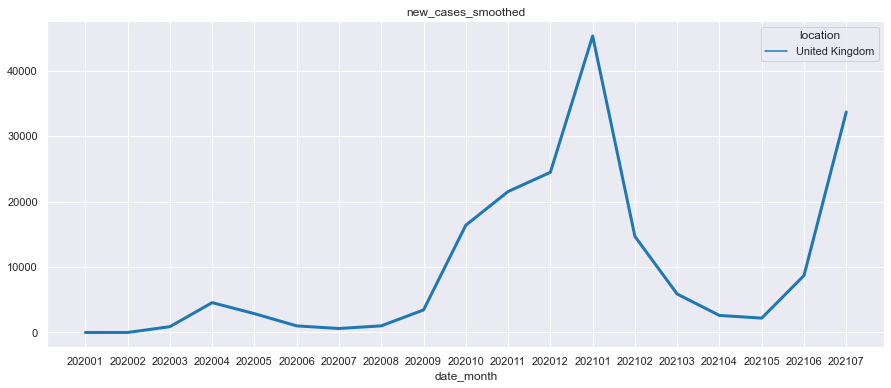

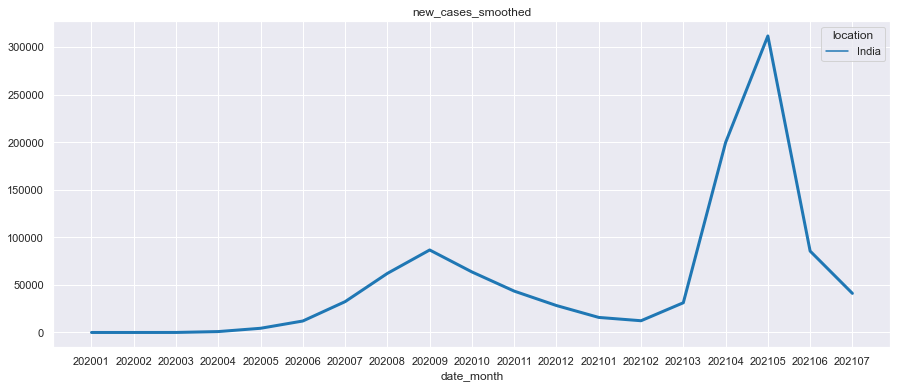

In [50]:
# 신규확진자 비율
pivot_table_world_new_cases = pd.pivot_table(countrys_covid, index = 'date_month', columns = 'location', values = 'new_cases_smoothed', aggfunc = 'mean')
pivot_table_world_new_cases = pivot_table_world_new_cases.fillna(0)
# 세계 신규확진자 평균
pv1 = pivot_table_world_new_cases[['United Kingdom']]
#print(pv1)
# 영국의 세계 평균 대비 신규확진자
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_cases_smoothed")
plt.show()

# 2-2. 인도의 new_cases_smoothed
# 신규확진자 비율
pivot_table_world_new_cases = pd.pivot_table(countrys_covid, index = 'date_month', columns = 'location', values = 'new_cases_smoothed', aggfunc = 'mean')
pivot_table_world_new_cases = pivot_table_world_new_cases.fillna(0)
# 세계 신규확진자 평균
pv2 = pivot_table_world_new_cases[['India']]
#print(pv1)
# 인도의 세계 평균 대비 신규확진자
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv2, ci = False, palette = "tab10", linewidth = 3,).set_title("new_cases_smoothed")
plt.show()

* 변이바이러스가 발생, 확산된 시점과 동일하게 신규 사망자 수도 상승. 특히 감마 변이 바이러스에 있어서 21년 1월 일평균 13000명에 달하는 사망자 발생 
* 영국은 알파 변이 바이러스 발생시점인 20년 12월 400명을 기점으로 지속적인 상승세를 보임. 
* 인도는 델타 바이러스가 발생한 시점이 21년 4월 직후인 5월 4000여명을 기록하며 심각한 상황을 나타냄

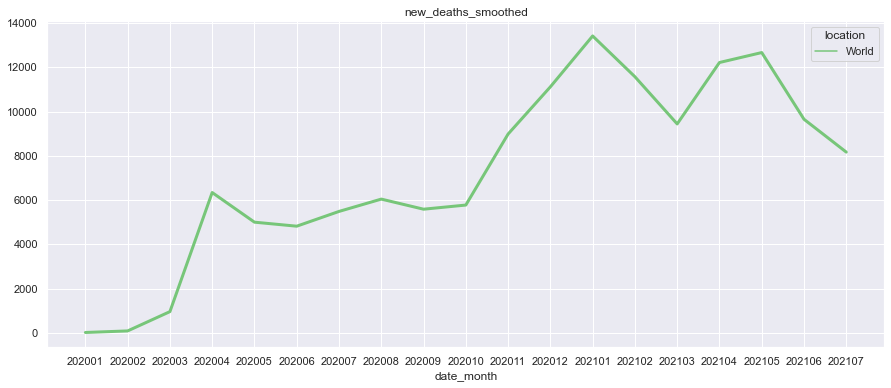

In [41]:
# 3. 전셰계 new_deaths_smoothed
pivot_table_world_new_deaths_smoothed= pd.pivot_table(world_covid, index = "date_month", columns = "location", values = 'new_deaths_smoothed', aggfunc = "mean")
pivot_table_world_new_deaths_smoothed = pivot_table_world_new_deaths_smoothed.fillna(0)
#pv7 = pivot_table_world_new_deaths_smoothed.iloc[422:]

sns.lineplot(data = pivot_table_world_new_deaths_smoothed, ci = False, palette = "YlGn", linewidth = 3,).set_title("new_deaths_smoothed")
plt.show()

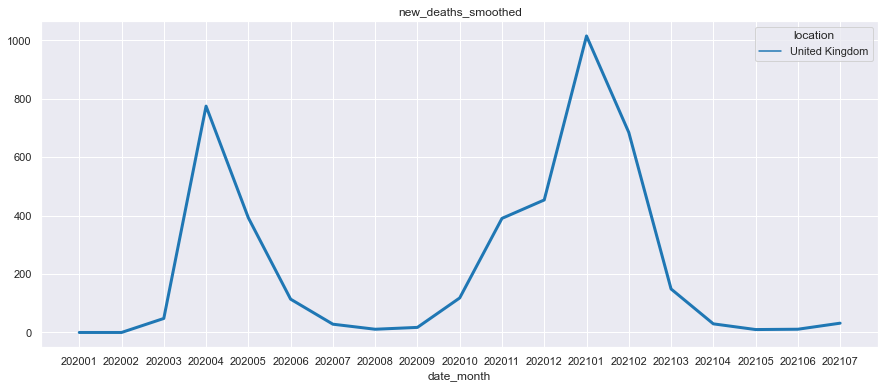

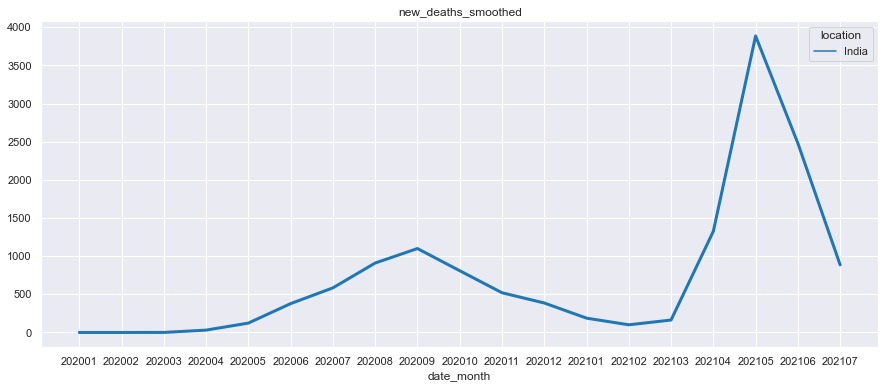

In [48]:
# 3-1. 영국의 new_deaths_smoothed
# 신규확진자 비율
pivot_table_world_new_deaths_smoothed = pd.pivot_table(countrys_covid, index = 'date_month', columns = 'location', values = 'new_deaths_smoothed', aggfunc = 'mean')
pivot_table_world_new_deaths_smoothed = pivot_table_world_new_deaths_smoothed.fillna(0)
# 세계 신규확진자 평균
pv1 = pivot_table_world_new_deaths_smoothed[['United Kingdom']]
#print(pv1)
# 영국의 세계 평균 대비 신규사망자
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_deaths_smoothed")
plt.show()

# 3-2. 인도의 new_deaths_smoothed
pivot_table_world_new_deaths_smoothed = pd.pivot_table(countrys_covid, index = 'date_month', columns = 'location', values = 'new_deaths_smoothed', aggfunc = 'mean')
pivot_table_world_new_deaths_smoothed = pivot_table_world_new_deaths_smoothed.fillna(0)
pv1 = pivot_table_world_new_deaths_smoothed[['India']]
#print(pv1)
# 영국의 세계 평균 대비 신규사망자
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_deaths_smoothed")
plt.show()

#### 1-2 대륙별 분석

In [65]:
corona_master = daily_covid.copy()

In [66]:
# 월별 집계
corona_master.groupby(["date_month", "location"]).sum()
corona_master.groupby(["date_month", "continent"]).sum()

pivot_people_vaccinated_per_hundred = pd.pivot_table(corona_master, index = "date_month", columns = "continent", 
               values = 'people_vaccinated_per_hundred', aggfunc = "mean")
pivot_new_deaths_per_million = pd.pivot_table(corona_master, index = "date_month", columns = "continent", 
               values = 'new_deaths_per_million', aggfunc = "sum")

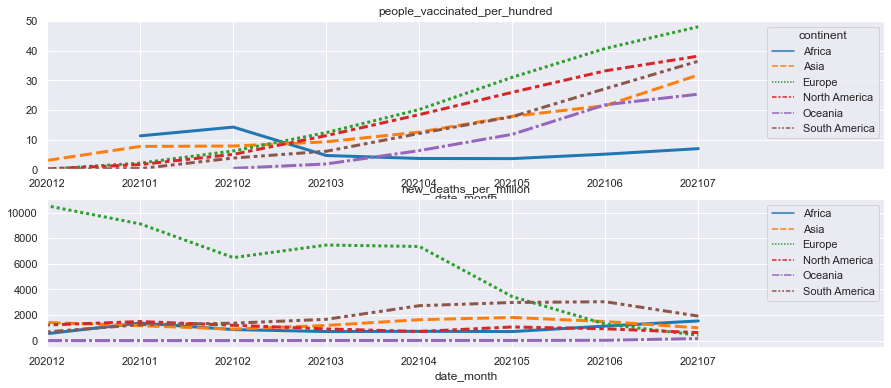

<Figure size 1080x432 with 0 Axes>

In [67]:
# 100명당 백신접종률 / 신규사망자수 시각화 -> 

#sns.set(rc={'figure.figsize':(15, 6)})
fig, ax = plt.subplots(2,1) # 1행2열의 그래프 그리기
sns.lineplot(data = pivot_people_vaccinated_per_hundred, ci= False, palette = "tab10", linewidth = 3, ax = ax[0]).set_title("people_vaccinated_per_hundred")
ax[0].set_ylim(0,50)
ax[0].set_xlim(0, 9)
sns.lineplot(data = pivot_new_deaths_per_million, ci = False, palette = "tab10", linewidth = 3, ax=ax[1]).set_title("new_deaths_per_million")
ax[1].set_xlim(11,20)
plt.legend(loc='upper right')
plt.show()
plt.savefig('People_vaccinated_per_hundred,New_deaths_per_million.png', dpi = 300)

In [68]:
# 유럽 백신접종률 상위 10개국은? (2021년 07월 18일 기준)
corona_master
tmp = corona_master[corona_master.date == '2021-07-18']
tmp1 = tmp[tmp.continent == 'Europe']
tmp2 = tmp1[['location', 'people_vaccinated_per_hundred']]
tmp3 = tmp2.sort_values(by=['people_vaccinated_per_hundred'], axis=0, ascending=False)
tmp4 = tmp3.iloc[1:11] # 백신접종률 상위 10개국
tmp4

,location,people_vaccinated_per_hundred
46442,Isle of Man,75.74
98870,United Kingdom,68.22
66767,Netherlands,68.09
25817,Denmark,67.73
10086,Belgium,67.09
33760,Finland,64.35
76409,Portugal,64.07
88828,Spain,63.06
47499,Italy,60.43
36523,Germany,59.52


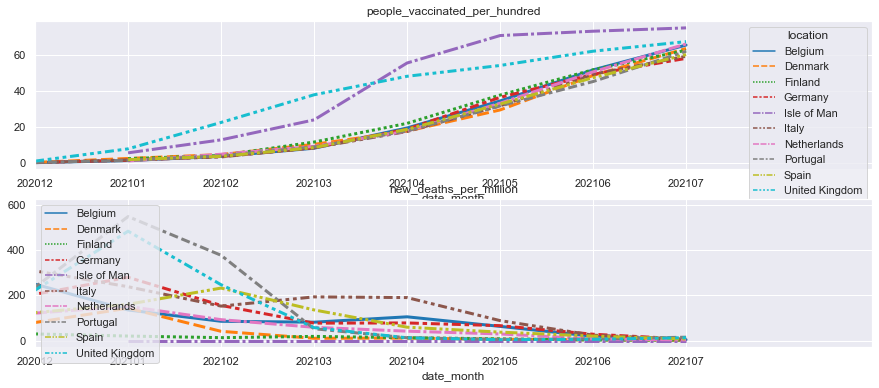

In [69]:
europe_top10 = corona_master[(corona_master.location == 'Isle of Man') | (corona_master.location == 'United Kingdom') | (corona_master.location == 'Netherlands') | (corona_master.location == 'Denmark') | 
              (corona_master.location == 'Belgium') | (corona_master.location == 'Finland') | (corona_master.location == 'Portugal') | (corona_master.location == 'Spain') |
              (corona_master.location == 'Italy') | (corona_master.location == 'Germany')]
pivot_eu10_vaccinated = pd.pivot_table(europe_top10, index = "date_month", columns = "location", 
               values = 'people_vaccinated_per_hundred', aggfunc = "mean")
pivot_eu10_death = pd.pivot_table(europe_top10, index = "date_month", columns = "location", 
               values = 'new_deaths_per_million', aggfunc = "sum")

# 100명당 백신접종률 / 신규사망자수 시각화 -> 

#sns.set(rc={'figure.figsize':(15, 6)})
fig, ax = plt.subplots(2,1) # 1행2열의 그래프 그리기
sns.lineplot(data = pivot_eu10_vaccinated, ci= False, palette = "tab10", linewidth = 3, ax = ax[0]).set_title("people_vaccinated_per_hundred")
ax[0].set_xlim(0, 9)
sns.lineplot(data = pivot_eu10_death, ci = False, palette = "tab10", linewidth = 3, ax=ax[1]).set_title("new_deaths_per_million")
plt.legend(loc='upper left')
ax[1].set_xlim(11, 20)
#ax[1].set_ylim(0, 500)
plt.show()
#plt.savefig('People_vaccinated_per_hundred,New_deaths_per_million.png', dpi = 300)

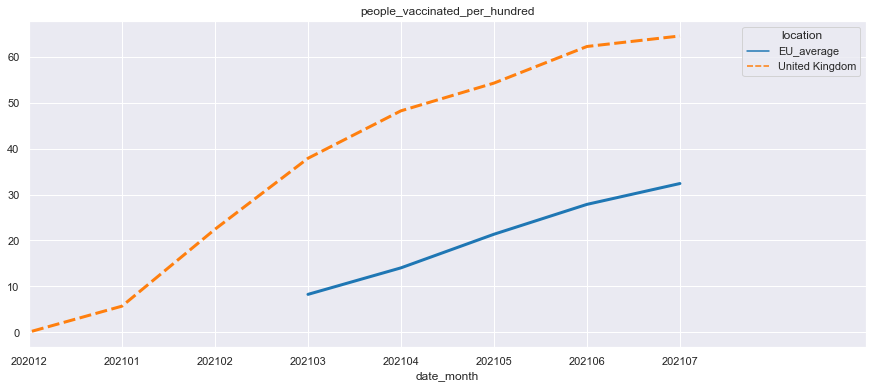

In [70]:
#  유럽만 추출한 데이터프레임 형성
europe_master = corona_master[corona_master.continent == 'Europe']
europe_master = europe_master.fillna(0)
europe_master
# 유럽 각 국가별 백신접종률
pivot_table_europe_vaccinated = pd.pivot_table(europe_master, index = "date_month", columns = "location", values = 'people_vaccinated_per_hundred', aggfunc = "mean")
pivot_table_europe_vaccinated
pivot_table_europe_vaccinated['EU_average'] = pivot_table_europe_vaccinated.values.mean(axis=1)
pv1 = pivot_table_europe_vaccinated[['EU_average', 'United Kingdom']]
# 영국의 유럽 평균 대비 백신접종률
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("people_vaccinated_per_hundred")
plt.xlim(11, 20)
plt.show()


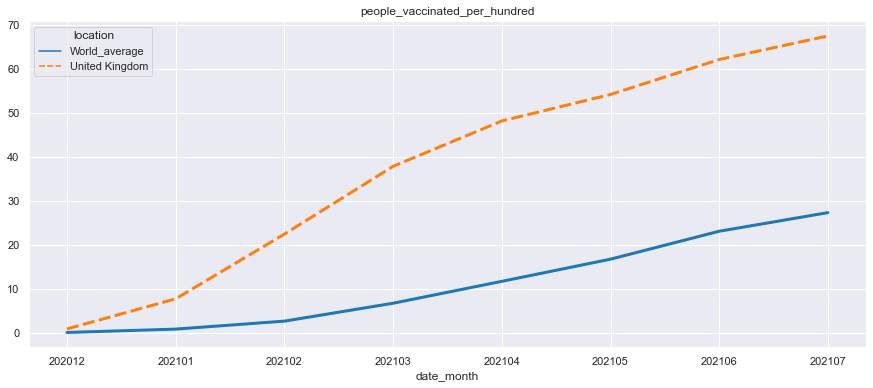

In [71]:
# 백신접종률
pivot_table_world_vaccinated = pd.pivot_table(corona_master, index = 'date_month', columns = 'location', values = 'people_vaccinated_per_hundred', aggfunc = 'mean')
pivot_table_world_vaccinated = pivot_table_world_vaccinated.fillna(0)
# 세계 백신접종률 평균
pivot_table_world_vaccinated['World_average'] = pivot_table_world_vaccinated.values.mean(axis = 1)
pv0 = pivot_table_world_vaccinated[['World_average', 'United Kingdom']]
# 영국의 세계 평균 대비 백신접종률
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv0, ci = False, palette = "tab10", linewidth = 3,).set_title("people_vaccinated_per_hundred")
#plt.xlim(11, 20)
plt.show()

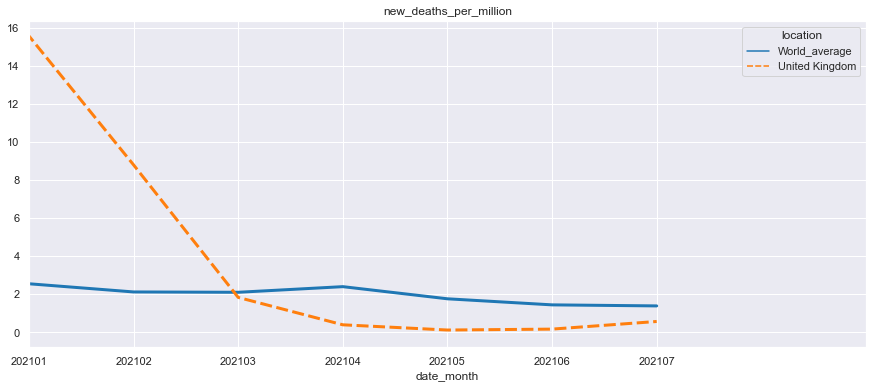

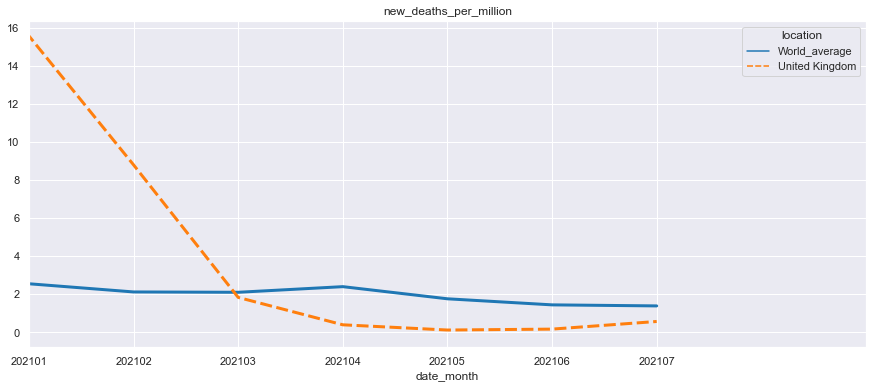

In [72]:
# 신규 사망자수
pivot_table_world_new_deaths= pd.pivot_table(corona_master, index = 'date_month', columns = 'location', values = 'new_deaths_per_million', aggfunc = 'mean')
pivot_table_world_new_deaths = pivot_table_world_new_deaths.fillna(0)
# 세계 백신접종률 평균
pivot_table_world_new_deaths['World_average'] = pivot_table_world_new_deaths.values.mean(axis = 1)
pv1 = pivot_table_world_new_deaths[['World_average', 'United Kingdom']]
#print(pv1)
# 영국의 세계 평균 대비 백신접종률
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_deaths_per_million")
plt.xlim(12, 20)
plt.show()

# 유럽 각 국가별 신규 사망자수
pivot_table_europe_new_deaths = pd.pivot_table(europe_master, index = "date_month", columns = "location", values = 'new_deaths_per_million', aggfunc = "mean")
pivot_table_europe_new_deaths
pivot_table_europe_new_deaths['EU_average'] = pivot_table_europe_vaccinated.values.mean(axis=1)
pv2 = pivot_table_europe_new_deaths[['EU_average', 'United Kingdom']]
# 영국의 유럽 평균 대비 백신접종률
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_deaths_per_million")
plt.xlim(12, 20)
plt.show()

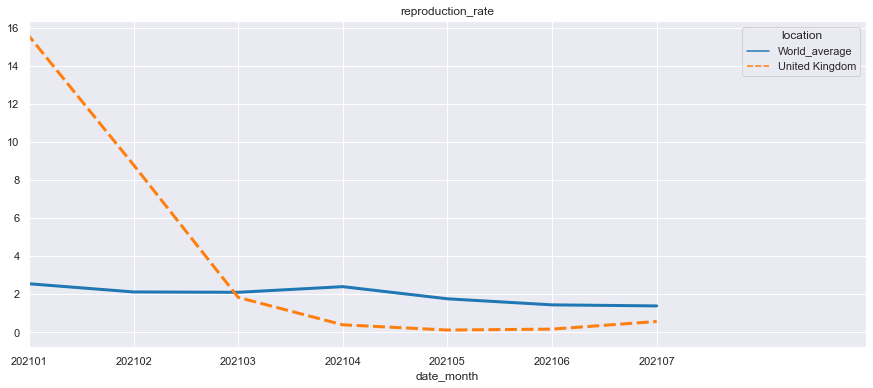

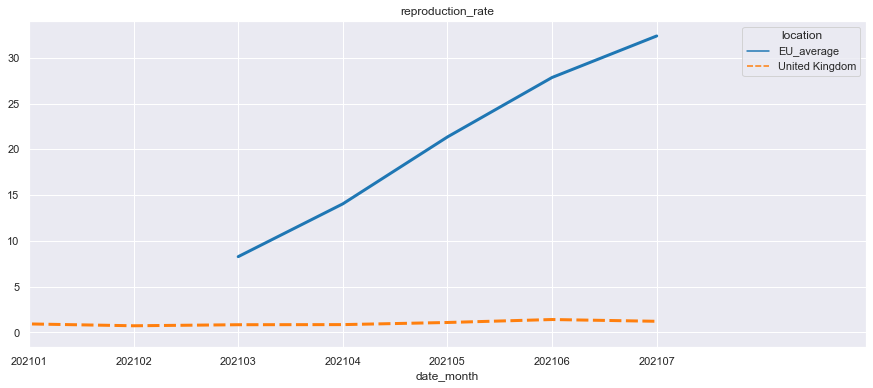

In [73]:
# 재생산비율
pivot_table_world_reproduction = pd.pivot_table(corona_master, index = 'date_month', columns = 'location', values = 'reproduction_rate', aggfunc = 'mean')
pivot_table_world_reproduction = pivot_table_world_reproduction.fillna(0)
# 세계 재생산비율 평균
pivot_table_world_reproduction['World_average'] = pivot_table_world_reproduction.values.mean(axis = 1)
pv3 = pivot_table_world_reproduction[['World_average', 'United Kingdom']]
#print(pv1)
# 영국의 세계 평균 대비 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("reproduction_rate")
plt.xlim(12, 20)
plt.show()

# 유럽 각 국가별 재생산비율
pivot_table_europe_new_deaths = pd.pivot_table(europe_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_europe_new_deaths
pivot_table_europe_new_deaths['EU_average'] = pivot_table_europe_vaccinated.values.mean(axis=1)
pv1 = pivot_table_europe_new_deaths[['EU_average', 'United Kingdom']]
# 영국의 유럽 평균 대비 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("reproduction_rate")
plt.xlim(12, 20)
plt.show()

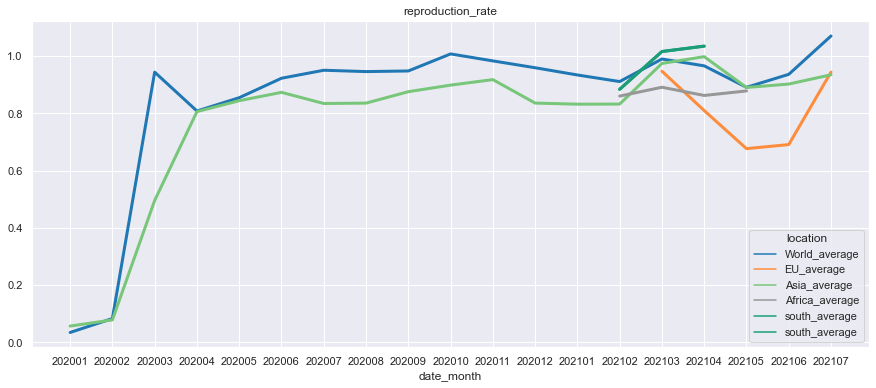

In [74]:
# 달별 재생산비율
# 재생산비율
pivot_table_world_reproduction = pd.pivot_table(corona_master, index = 'date_month', columns = 'location', values = 'reproduction_rate', aggfunc = 'mean')
pivot_table_world_reproduction = pivot_table_world_reproduction.fillna(0)
# 세계 재생산비율 평균
pivot_table_world_reproduction['World_average'] = pivot_table_world_reproduction.values.mean(axis = 1)
pv3 = pivot_table_world_reproduction[['World_average']]
#print(pv3)
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv3, ci = False, palette = "tab10", linewidth = 3,).set_title("reproduction_rate")
#plt.xlim(12, 20)

# 유럽만 추출한 데이터프레임 형성
europe_master = corona_master[corona_master.continent == 'Europe']
europe_master = europe_master.fillna(0)
# 유럽 각 국가별 재생산비율
pivot_table_europe_reproduction_rate = pd.pivot_table(europe_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_europe_reproduction_rate['EU_average'] = pivot_table_europe_reproduction_rate.values.mean(axis=1)
pv1 = pivot_table_europe_reproduction_rate[['EU_average']]
# 유럽 평균 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "Oranges", linewidth = 3,).set_title("reproduction_rate")

# 아시아 각 국가별 재생산비율
pivot_table_asia_reproduction = pd.pivot_table(asia_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_asia_reproduction = pivot_table_asia_reproduction.fillna(0)
pivot_table_asia_reproduction['Asia_average'] = pivot_table_asia_reproduction.values.mean(axis=1)
pv4 = pivot_table_asia_reproduction[['Asia_average']]
# 아시아 평균 재생산 비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv4, ci = False, palette = "YlGn", linewidth = 3,).set_title("reproduction_rate")

# 아프리카만 추출한 데이터프레임 형성
africa_master = corona_master[corona_master.continent == 'Africa']
africa_master = africa_master.fillna(0)
# 아프리카 각 국가별 재생산비율
pivot_table_africa_reproduction_rate = pd.pivot_table(africa_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_africa_reproduction_rate['Africa_average'] = pivot_table_africa_reproduction_rate.values.mean(axis=1)
pv5 = pivot_table_africa_reproduction_rate[['Africa_average']]
# 아프리카 평균 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv5, ci = False, palette = "Greys_r", linewidth = 3,).set_title("reproduction_rate")

# 오세아니아만 추출한 데이터프레임 형성
south_master = corona_master[corona_master.continent == 'South America']
south_master = south_master.fillna(0)
# 오세아니아 각 국가별 재생산비율
pivot_table_south_reproduction_rate = pd.pivot_table(south_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_south_reproduction_rate['south_average'] = pivot_table_south_reproduction_rate.values.mean(axis=1)
pv6 = pivot_table_south_reproduction_rate[['south_average']]
# 오세아니아 평균 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv6, ci = False, palette = "Dark2", linewidth = 3,).set_title("reproduction_rate")

# 남미만 추출한 데이터프레임 형성
south_master = corona_master[corona_master.continent == 'South America']
south_master = south_master.fillna(0)
# 남미 각 국가별 재생산비율
pivot_table_south_reproduction_rate = pd.pivot_table(south_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_south_reproduction_rate['south_average'] = pivot_table_south_reproduction_rate.values.mean(axis=1)
pv6 = pivot_table_south_reproduction_rate[['south_average']]
# 남미 평균 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv6, ci = False, palette = "Dark2", linewidth = 3,).set_title("reproduction_rate")
plt.show()


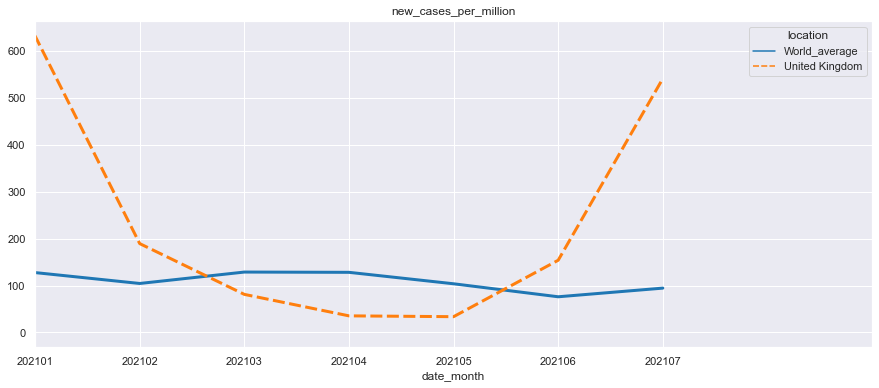

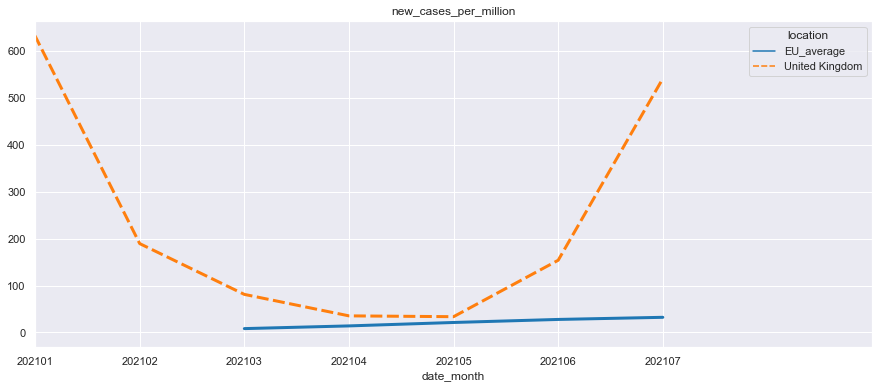

In [75]:
# 신규확진자 비율
pivot_table_world_new_cases = pd.pivot_table(corona_master, index = 'date_month', columns = 'location', values = 'new_cases_per_million', aggfunc = 'mean')
pivot_table_world_new_cases = pivot_table_world_new_cases.fillna(0)
# 세계 신규확진자 평균
pivot_table_world_new_cases['World_average'] = pivot_table_world_new_cases.values.mean(axis = 1)
pv1 = pivot_table_world_new_cases[['World_average', 'United Kingdom']]
#print(pv1)
# 영국의 세계 평균 대비 신규확진자
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_cases_per_million")
plt.xlim(12, 20)
plt.show()

# 유럽 각 국가별 신규확진자
pivot_table_europe_new_deaths = pd.pivot_table(europe_master, index = "date_month", columns = "location", values = 'new_cases_per_million', aggfunc = "mean")
pivot_table_europe_new_deaths
pivot_table_europe_new_deaths['EU_average'] = pivot_table_europe_vaccinated.values.mean(axis=1)
pv1 = pivot_table_europe_new_deaths[['EU_average', 'United Kingdom']]
# 영국의 유럽 평균 대비 신규확진자
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "tab10", linewidth = 3,).set_title("new_cases_per_million")
plt.xlim(12, 20)
plt.show()

#### 1-3 한국의 상황 분석
* 전체적으로 세계 평균이나 아시아 평균에 비해 백만명당 신규확진자 수가 낮게 유지됨

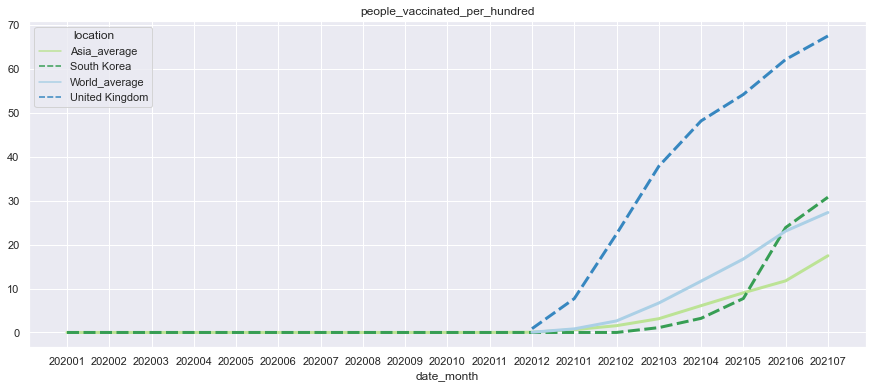

In [76]:
#  아시아만 추출한 데이터프레임 형성
asia_master = corona_master[corona_master.continent == 'Asia']
asia_master = asia_master.fillna(0)
asia_master
# 아시아 각 국가별 백신접종률
pivot_table_asia_vaccinated = pd.pivot_table(asia_master, index = "date_month", columns = "location", values = 'people_vaccinated_per_hundred', aggfunc = "mean")
pivot_table_asia_vaccinated = pivot_table_asia_vaccinated.fillna(0)
pivot_table_asia_vaccinated['Asia_average'] = pivot_table_asia_vaccinated.values.mean(axis=1)
pv1 = pivot_table_asia_vaccinated[['Asia_average', 'South Korea']]
# 한국의 아시아, 세계 평균 대비 백신접종률
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "YlGn", linewidth = 3,).set_title("people_vaccinated_per_hundred")
sns.lineplot(data = pv0, ci = False, palette = "Blues", linewidth = 3,).set_title("people_vaccinated_per_hundred")
#plt.xlim(11, 20)
plt.show()

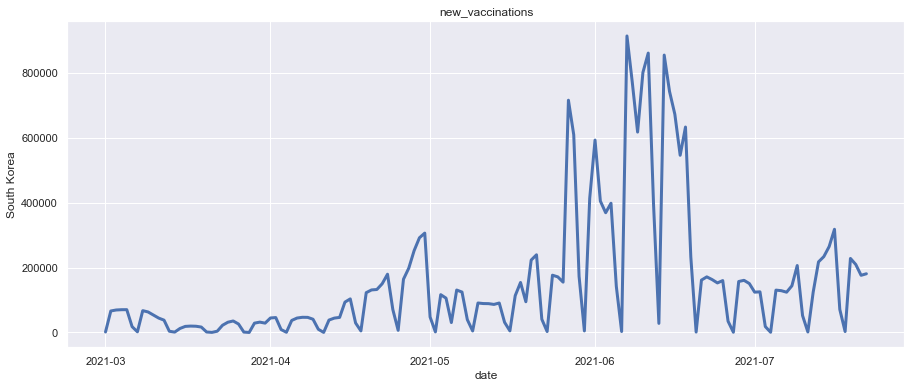

In [77]:
# 한국의 일일 신규 백신접종수
pivot_table_asia_vaccinated_daily = pd.pivot_table(asia_master, index = "date", columns = "location", values = 'new_vaccinations')
pivot_table_asia_vaccinated_daily = pivot_table_asia_vaccinated_daily.fillna(0)
pv1 = pivot_table_asia_vaccinated_daily['South Korea']
pv1 = pv1.iloc[422:]

sns.lineplot(data = pv1, ci = False, palette = "YlGn", linewidth = 3,).set_title("new_vaccinations")
plt.show()

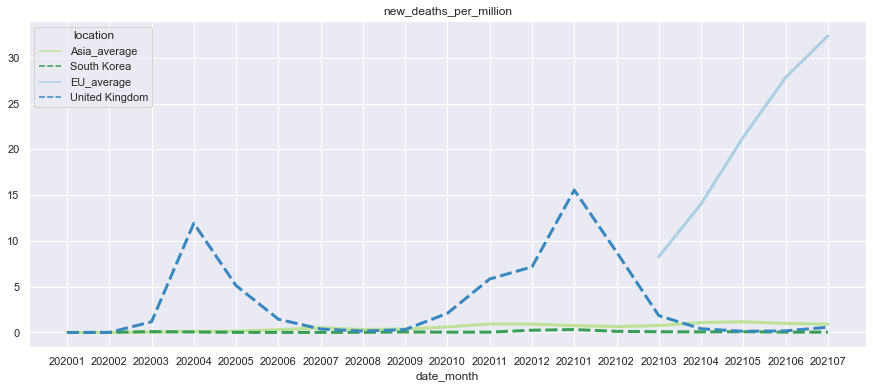

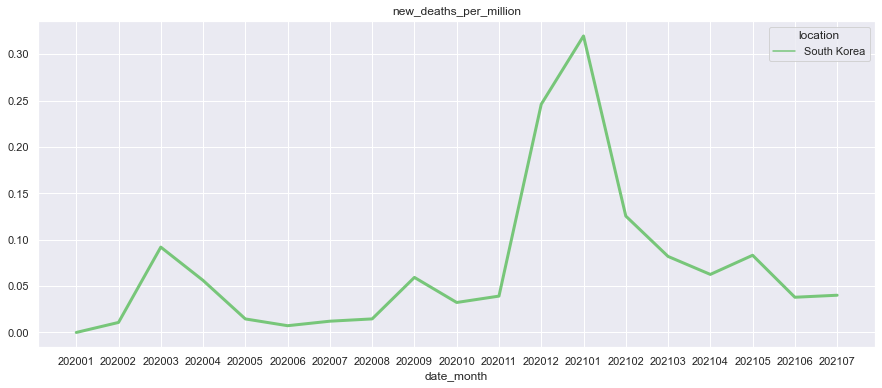

In [78]:
# 아시아 각 국가별 신규사망률
pivot_table_asia_new_deaths = pd.pivot_table(asia_master, index = "date_month", columns = "location", values = 'new_deaths_per_million', aggfunc = "mean")
pivot_table_asia_new_deaths = pivot_table_asia_new_deaths.fillna(0)
pivot_table_asia_new_deaths['Asia_average'] = pivot_table_asia_new_deaths.values.mean(axis=1)
pv1 = pivot_table_asia_new_deaths[['Asia_average', 'South Korea']]
# 한국의 아시아, 세계 평균 대비 신규사망률
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "YlGn", linewidth = 3,).set_title("new_deaths_per_million")
sns.lineplot(data = pv2, ci = False, palette = "Blues", linewidth = 3,).set_title("new_deaths_per_million")
#plt.xlim(11, 20)
plt.show()
pv1_korea = pivot_table_asia_new_deaths[['South Korea']]
sns.lineplot(data = pv1_korea, ci = False, palette = "YlGn", linewidth = 3,).set_title("new_deaths_per_million")
plt.show()

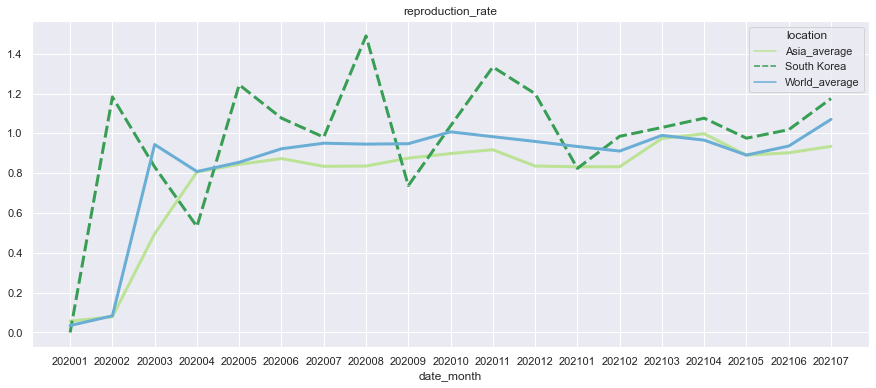

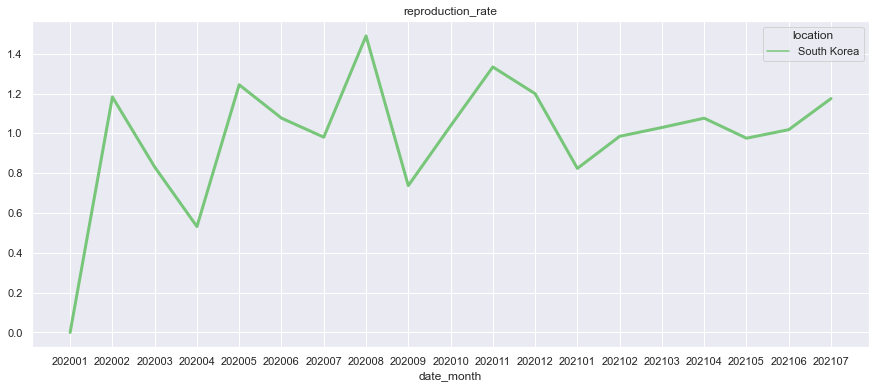

In [79]:
# 아시아 각 국가별 재생산비율
pivot_table_asia_reproduction = pd.pivot_table(asia_master, index = "date_month", columns = "location", values = 'reproduction_rate', aggfunc = "mean")
pivot_table_asia_reproduction = pivot_table_asia_reproduction.fillna(0)
pivot_table_asia_reproduction['Asia_average'] = pivot_table_asia_reproduction.values.mean(axis=1)
pv1 = pivot_table_asia_reproduction[['Asia_average', 'South Korea']]
# 한국의 아시아, 세계 평균 대비 재생산비율
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(data = pv1, ci = False, palette = "YlGn", linewidth = 3,).set_title("reproduction_rate")
sns.lineplot(data = pv3, ci = False, palette = "Blues", linewidth = 3,).set_title("reproduction_rate")
#plt.xlim(11, 20)
plt.show()
pv1_korea = pivot_table_asia_reproduction[['South Korea']]
sns.lineplot(data = pv1_korea, ci = False, palette = "YlGn", linewidth = 3,).set_title("reproduction_rate")
plt.show()

#### 1-4 경제적 측면에서 분석

In [156]:
df = pd.read_csv('./DATA/Global_data.csv')

In [157]:
# 경제성장률
gdp_data = df[df['Subject Descriptor'] == 'Gross domestic product, constant prices']
gdp_data = gdp_data[['Country','2015', '2016', '2017', '2018', '2019', '2020', '2021']].reset_index(drop = True)


# 실업률
emp_data = df[df['Subject Descriptor'] == 'Unemployment rate']
emp_data = emp_data[['Country',  '2015', '2016', '2017', '2018', '2019', '2020', '2021']].reset_index(drop = True)

In [158]:
# 평균
gdp_data.loc['Mean',:] = gdp_data.mean(axis = 0)
emp_data.loc['Mean',:] = emp_data.mean(axis = 0)

# DF로 만들기
gdp_world = gdp_data[gdp_data.index == 'Mean']
emp_world = emp_data[emp_data.index == 'Mean']

gdp_world = gdp_world.drop('Country', axis = 1)
emp_world = emp_world.drop('Country', axis = 1)

gdp_world = gdp_world.transpose()
emp_world = emp_world.transpose()

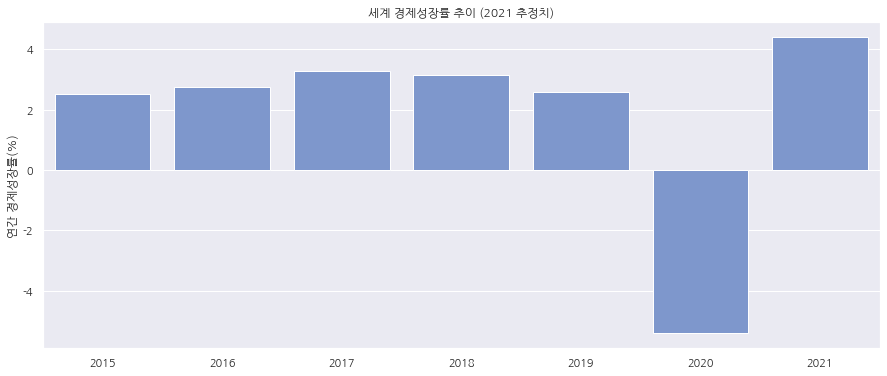

In [159]:
# 세계경제성장률
sns.barplot(data = gdp_world,
            x = gdp_world.index,
            y = 'Mean', color = '#7193D9')

plt.title('세계 경제성장률 추이 (2021 추정치)')
plt.ylabel('연간 경제성장률(%)')
plt.show()

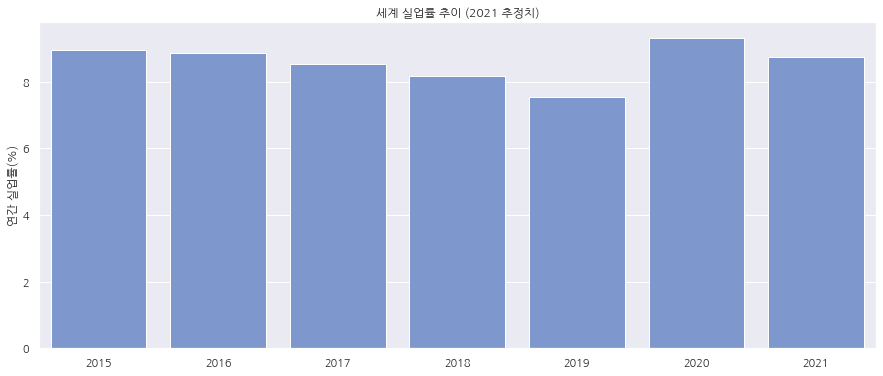

In [160]:
# 세계실업률
sns.barplot(data = emp_world,
            x = emp_world.index,
            y = 'Mean', color = '#7193D9')

plt.title('세계 실업률 추이 (2021 추정치)')
plt.ylabel('연간 실업률(%)')
plt.show()

In [161]:
gdp_korea = gdp_data[gdp_data['Country'] == 'Korea']
gdp_korea = gdp_korea.drop('Country', axis = 1)
gdp_korea = gdp_korea.transpose()
gdp_korea
gdp_korea.loc['2019',:] - gdp_korea.loc['2020',:]

89    2.997
dtype: float64

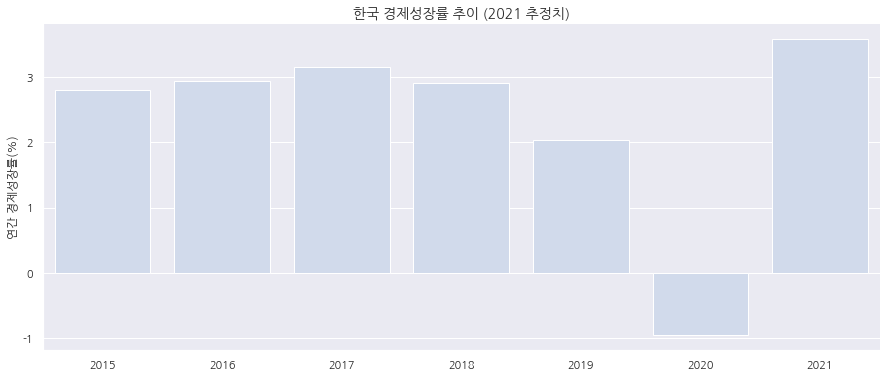

In [162]:
# 한국 경제성장률
sns.barplot(data = gdp_korea,
            x = gdp_korea.index,
            y = 89, color = '#CDD8EF')
sns.despine()

plt.title('한국 경제성장률 추이 (2021 추정치)', fontsize =14)
plt.ylabel('연간 경제성장률(%)')
plt.show()

In [165]:
emp_korea = emp_data[emp_data['Country'] == 'Korea']
emp_korea = emp_korea.drop('Country', axis = 1)
emp_korea = emp_korea.transpose()
emp_korea
emp_korea.loc['2019',:] - emp_korea.loc['2020',:]

89   -0.159
dtype: float64

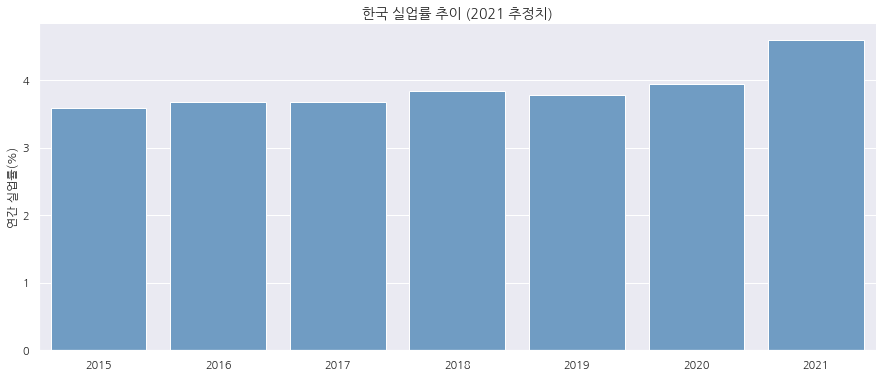

In [166]:
# 한국 실업률
sns.barplot(data = emp_korea,
            x = emp_korea.index,
            y = 89, color = '#629DD1')
sns.despine()

plt.title('한국 실업률 추이 (2021 추정치)',  fontsize =14)
plt.ylabel('연간 실업률(%)')
plt.show()

### 2.벤치마킹 국가 선정
* 전염관리 측면, 경제적 타격 측면에서 선정
* 전체국가 >> 인구 800만명 이상의 국가 >> OECD국가로 좁혀들어가면서 분석함

#### 2-1 . 국가별 코로나 확산관리 비교 
* 전염관리 측면에서 개별 국가는 확산을 얼마나 잘 관리하고 있는가 ? 
1. 확진자 수 (인구대비 확진자의 비율) _ 분기별 ranking비교 
2. 재생산율의 변화 - 분기별 rankinng 비교 
3. 확진자를 얼마나 잘 관리하고 있는가 ? - 분기별 ranking 비교
      ⇒ 사망자 수  

* 분기별 집계

In [83]:
#분기 변수 추가 
countrys_covid["quarter"] = pd.PeriodIndex(countrys_covid["date"],freq="Q")

In [87]:
# 순위 (1:가장작음 , 100:가장큼 => rank가 낮을수록 안좋음 )
def ranking(df):
    rank = pd.concat([df["2020Q1"].rank(method='min'),
                      df["2020Q2"].rank(method='min'),
                      df["2020Q3"].rank(method='min'),
                      df["2020Q4"].rank(method='min'),
                      df["2021Q1"].rank(method='min'),
                      df["2021Q2"].rank(method='min'),
                      df["2021Q3"].rank(method='min')],axis=1) 
    return rank

In [88]:
#전체 국가에서 top 30 , bottom 30 국가 
def top_30(df):
    top_30 = pd.concat([df["2020Q1"].sort_values(ascending = False)[:30].reset_index(),
                       df["2020Q2"].sort_values(ascending = False)[:30].reset_index(),
                       df["2020Q3"].sort_values(ascending = False)[:30].reset_index(),
                       df["2020Q4"].sort_values(ascending = False)[:30].reset_index(),
                       df["2021Q1"].sort_values(ascending = False)[:30].reset_index(),
                       df["2021Q2"].sort_values(ascending = False)[:30].reset_index(),
                       df["2021Q3"].sort_values(ascending = False)[:30].reset_index()],axis=1)
    return top_30

def bottom_30(df):
    top_30 = pd.concat([df["2020Q1"].sort_values()[:30].reset_index(),
                       df["2020Q2"].sort_values()[:30].reset_index(),
                       df["2020Q3"].sort_values()[:30].reset_index(),
                       df["2020Q4"].sort_values()[:30].reset_index(),
                       df["2021Q1"].sort_values()[:30].reset_index(),
                       df["2021Q2"].sort_values()[:30].reset_index(),
                       df["2021Q3"].sort_values()[:30].reset_index()],axis=1)
    return top_30

In [89]:
# 분기별 신규 확진자 비율 
ncpm = pd.pivot_table(countrys_covid,index = "location",
               columns = "quarter",
               values = "new_cases_per_million",aggfunc = "mean")

In [90]:
# 분기별 신규 사망자 비율 
ndpm = pd.pivot_table(countrys_covid,index = "location",
               columns = "quarter",
               values = "new_deaths_per_million",aggfunc = "mean")

In [91]:
# 분기별 재생산률 비율 
rr=pd.pivot_table(countrys_covid,index = "location",
               columns = "quarter",
               values = "reproduction_rate",aggfunc = "mean")

* 100개 국가 대상으로 실행

In [43]:
# 인구 기준으로 100개의 국가 선정 

In [93]:
country = country_info[country_info.continent.isnull()==False]
pop_rank_100 = np.array(country[country["population"] > 8000000].index)
pop_rank_100 = [countrys[1] for countrys in pop_rank_100]

In [94]:
cc_100 = countrys_covid[countrys_covid["location"].isin(pop_rank_100)]

In [106]:
# 분기별 누적 확진자 수 비율 (인구대비)
tcpm = pd.pivot_table(cc_100,index = "location",
               columns = "quarter",
               values = "total_cases_per_million",aggfunc = "max")

# 분기별 신규 확진자 비율 
ncpm = pd.pivot_table(cc_100,index = "location",
               columns = "quarter",
               values = "new_cases_per_million",aggfunc = "mean")

# 분기별 재생산률 비율 
rr =pd.pivot_table(cc_100,index = "location",
               columns = "quarter",
               values = "reproduction_rate",aggfunc = "mean")

# 분기별 신규 사망자 비율 
ndpm = pd.pivot_table(cc_100,index = "location",
               columns = "quarter",
               values = "new_deaths_per_million",aggfunc = "mean")

In [107]:
ncpm["2020Q3_2021Q2"]=np.mean(ncpm.iloc[:,2:6],axis=1)
rr["2020Q3_2021Q2"]=np.mean(rr.iloc[:,2:6],axis=1)
ndpm["2020Q3_2021Q2"]=np.mean(ndpm.iloc[:,2:6],axis=1)

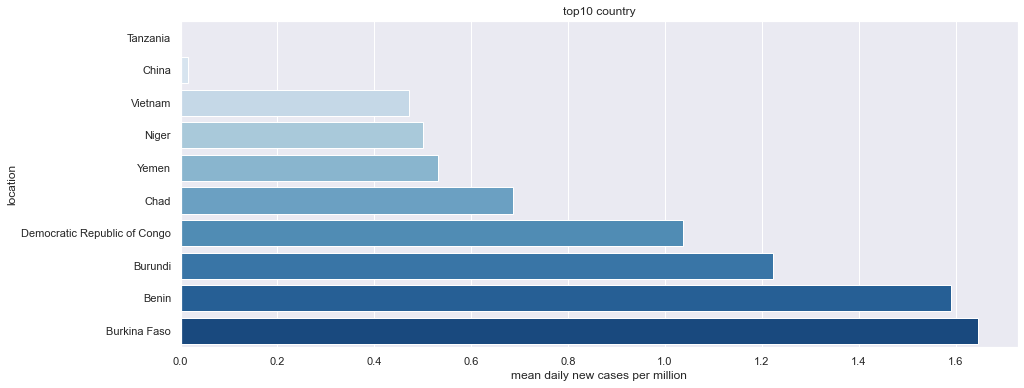

In [108]:
top10 = ncpm["2020Q3_2021Q2"].sort_values().iloc[:10].reset_index()   #top10 국가 리스트 
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",                                      #해당 데이터 칼럼 이름 
            y = "location",                                           #국가명 
            orient = "h", 
           palette = "Blues")                                         #색깔지정 
plt.xlabel("mean daily new cases per million")
plt.title("top10 country")
plt.show()     

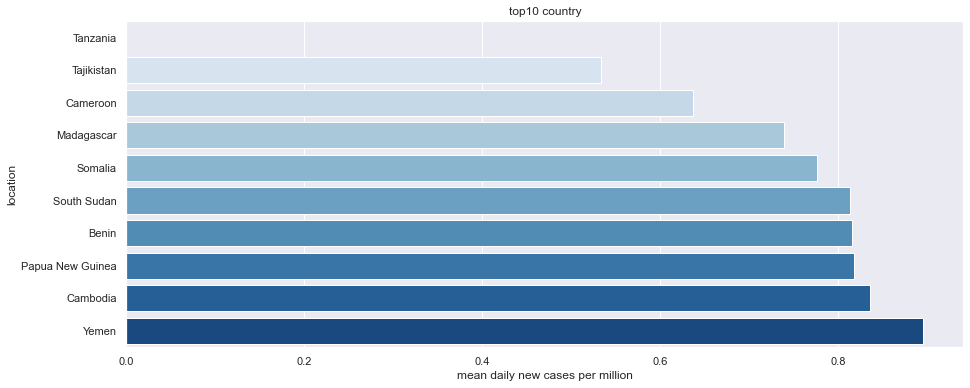

In [109]:
top10 = rr["2020Q3_2021Q2"].sort_values().iloc[:10].reset_index()
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h",
           palette = "Blues")
plt.xlabel("mean daily new cases per million")
plt.title("top10 country")
plt.show()    

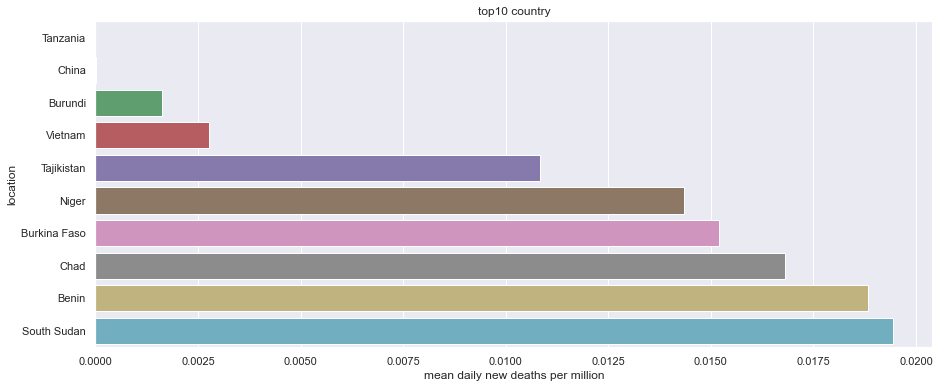

In [112]:
 top10 = ndpm["2020Q3_2021Q2"].sort_values().iloc[:10].reset_index()
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("mean daily new deaths per million")
plt.title("top10 country")
plt.show()      

In [113]:
top_rank = pd.DataFrame(columns = ["cases","reproduction_rate","death"])
bottom_rank = pd.DataFrame(columns = ["cases","reproduction_rate","death"])

In [114]:
ndpm_rank = ndpm["2020Q3_2021Q2"].rank(method='min').sort_values().reset_index()
top_rank["death"]=ndpm_rank.loc[:10,"location"]
bottom_rank["death"]=list(ndpm_rank.loc[90:,"location"])

ncpm_rank = ncpm["2020Q3_2021Q2"].rank(method='min').sort_values().reset_index()
top_rank["cases"]=ncpm_rank.loc[:10,"location"]
bottom_rank["cases"]=list(ncpm_rank.loc[90:,"location"])

rr_rank = rr["2020Q3_2021Q2"].rank(method='min').sort_values().reset_index()
top_rank["reproduction_rate"]=rr_rank.loc[:10,"location"]
bottom_rank["reproduction_rate"]=list(rr_rank.loc[90:,"location"])

In [115]:
bottom_rank

,cases,reproduction_rate,death
0,Portugal,Haiti,Italy
1,Hungary,Uganda,Mexico
2,Belgium,Myanmar,Romania
3,France,Zimbabwe,Poland
4,United States,Sweden,Colombia
5,Israel,Cuba,Argentina
6,Netherlands,Thailand,Brazil
7,Argentina,Malaysia,Czechia
8,Sweden,Spain,Hungary
9,Czechia,Tunisia,Peru


* top 10 국가들과 bot 국가 특징 차이
 - 평균 검사횟수
 - 중위연령

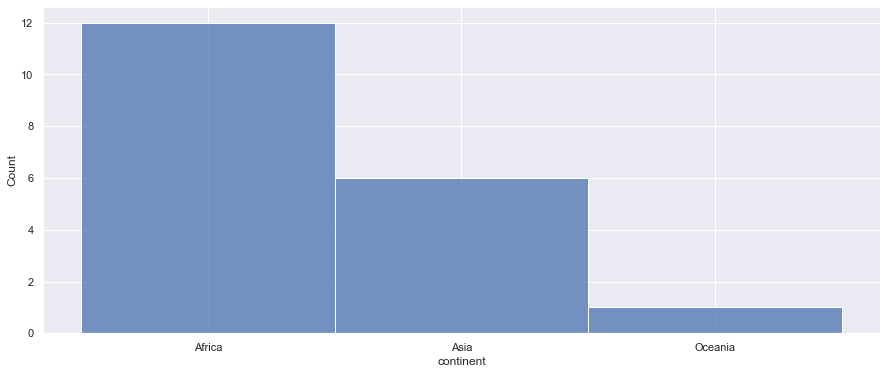

In [121]:
sns.histplot(data =top,
            x = "continent",
            palette = "Blues")
plt.show()

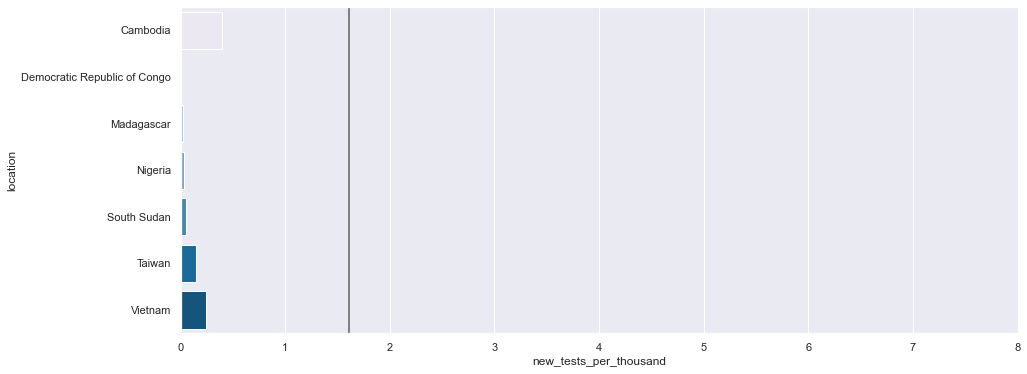

In [116]:
# 분기별 평균 검사 횟수 차이 (top 국가)
ntpt = pd.pivot_table(cc_100,index = "location",
               columns = "quarter",
               values = "new_tests_per_thousand",aggfunc = "mean")
ntpt["2020Q3_2021Q2"]=np.mean(ntpt.iloc[:,2:6],axis=1)
top =  ntpt[ntpt.index.isin(top_rank["cases"])|
    ntpt.index.isin(top_rank["reproduction_rate"])|
    ntpt.index.isin(top_rank["death"])].reset_index()

sns.barplot(data = top,
            x = "2020Q3_2021Q2",
            y = "location",
           orient = 'h',
           palette = "PuBu")
plt.axis(xmin = 0, xmax = 8 )
plt.xlabel("new_tests_per_thousand")


plt.axvline(1.61, color = "gray", linewidth = "2")
plt.show()

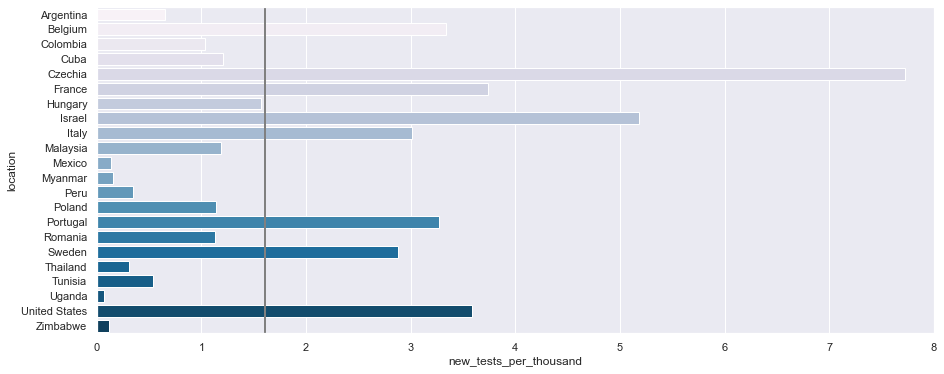

In [117]:
# 분기별 평균 검사 횟수 차이  (bottom국가)
ntpt = pd.pivot_table(cc_100,index = "location",
               columns = "quarter",
               values = "new_tests_per_thousand",aggfunc = "mean")
ntpt["2020Q3_2021Q2"]=np.mean(ntpt.iloc[:,2:6],axis=1)
bot =  ntpt[ntpt.index.isin(bottom_rank["cases"])|
    ntpt.index.isin(bottom_rank["reproduction_rate"])|
    ntpt.index.isin(bottom_rank["death"])].reset_index()

sns.barplot(data = bot,
            x = "2020Q3_2021Q2",
            y = "location",
           orient = 'h',
           palette = "PuBu")
plt.axis(xmin = 0, xmax = 8 )
plt.xlabel("new_tests_per_thousand")

plt.axvline(1.61, color = "gray", linewidth = "2")
plt.show()

In [119]:
country_info = country_info.reset_index()

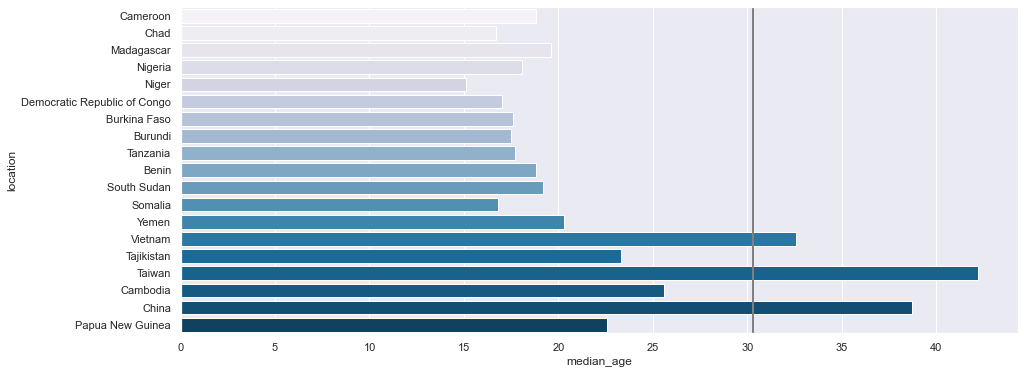

In [120]:
# top 국가 중위연령
top = country_info[country_info["location"].isin(top_rank["cases"])|
            country_info["location"].isin(top_rank["reproduction_rate"])|
            country_info["location"].isin(top_rank["death"])]
sns.barplot(data = top,
            x = "median_age",
            y = "location",
           orient = 'h',
           palette = "PuBu")

plt.axvline(30.3, color = "gray", linewidth = "2")
plt.show()

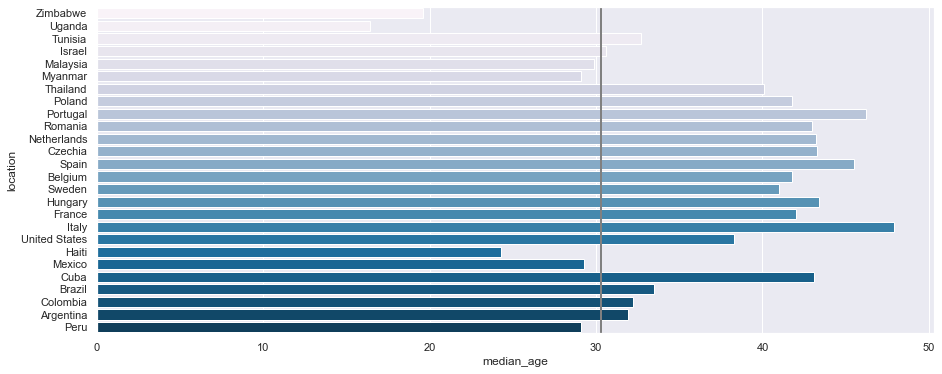

In [122]:
#bottom 국가 중위연령
bot = country_info[country_info["location"].isin(bottom_rank["cases"])|
            country_info["location"].isin(bottom_rank["reproduction_rate"])|
            country_info["location"].isin(bottom_rank["death"])]
sns.barplot(data = bot,
            x = "median_age",
            y = "location",
           orient = 'h',
             palette = "PuBu")

plt.axvline(30.3, color = "gray", linewidth = "2")
plt.show()

#### OECD국가 대상 분석 
* 100개 국가를 대상으로 할 경우 검사횟수의 절대적차이, 낮은 중위연령으로 인해서 주로 아프리카, 중동의 국가들이 상위국가로 선정되는 문제점이 발생함

In [123]:
oecd = ["Austria","Australia","Belgium","Canada","Chile",'Colombia',"Costa Rica",'Czechia',
       "Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland","Israel","Italy",
       "Japan","South Korea","Latvia","Lithuania",'Luxembourg',"Mexico","Netherlands","New Zealand",
       "Norway","Poland","Portugal",'Slovakia',"Slovenia","Spain","Sweden","Switzerland","Turkey",
       "United Kingdom","United States"]

cc_oecd = countrys_covid[countrys_covid["location"].isin(oecd)]
len(cc_oecd.location.unique())

37

In [124]:
# 분기별 신규 확진자 비율 
ncpm = pd.pivot_table(cc_oecd,index = "location",
               columns = "quarter",
               values = "new_cases_per_million",aggfunc = "mean")

# 분기별 재생산률 비율 
rr =pd.pivot_table(cc_oecd,index = "location",
               columns = "quarter",
               values = "reproduction_rate",aggfunc = "mean")

# 분기별 신규 사망자 비율 
ndpm = pd.pivot_table(cc_oecd,index = "location",
               columns = "quarter",
               values = "new_deaths_per_million",aggfunc = "mean")

In [125]:
ncpm["2020Q3_2021Q2"]=np.mean(ncpm.iloc[:,2:6],axis=1)
rr["2020Q3_2021Q2"]=np.mean(rr.iloc[:,2:6],axis=1)
ndpm["2020Q3_2021Q2"]=np.mean(ndpm.iloc[:,2:6],axis=1)

In [126]:
top_rank = pd.DataFrame(columns = ["cases","reproduction_rate","death"])
bottom_rank = pd.DataFrame(columns = ["cases","reproduction_rate","death"])

In [127]:
ndpm_rank = ndpm["2020Q3_2021Q2"].rank(method='min').sort_values().reset_index()
top_rank["death"]=ndpm_rank.loc[:10,"location"]
bottom_rank["death"]=list(ndpm_rank.loc[27:,"location"])

ncpm_rank = ncpm["2020Q3_2021Q2"].rank(method='min').sort_values().reset_index()
top_rank["cases"]=ncpm_rank.loc[:10,"location"]
bottom_rank["cases"]=list(ncpm_rank.loc[27:,"location"])

rr_rank = rr["2020Q3_2021Q2"].rank(method='min').sort_values().reset_index()
top_rank["reproduction_rate"]=rr_rank.loc[:10,"location"]
bottom_rank["reproduction_rate"]=list(rr_rank.loc[27:,"location"])

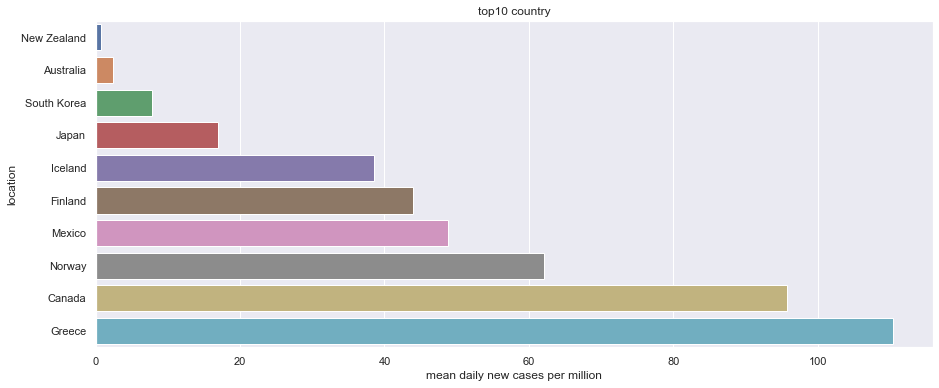

In [128]:
top10 = ncpm["2020Q3_2021Q2"].sort_values().iloc[:10].reset_index()
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("mean daily new cases per million")
plt.title("top10 country")
plt.axis
plt.show()      

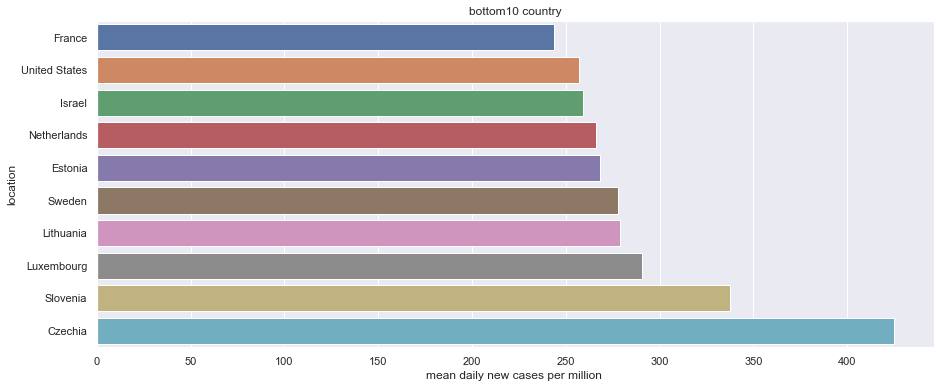

In [129]:
bottom10 = ncpm["2020Q3_2021Q2"].sort_values().iloc[27:].reset_index()
sns.barplot(data = bottom10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("mean daily new cases per million ")
plt.title("bottom10 country")
plt.show()       

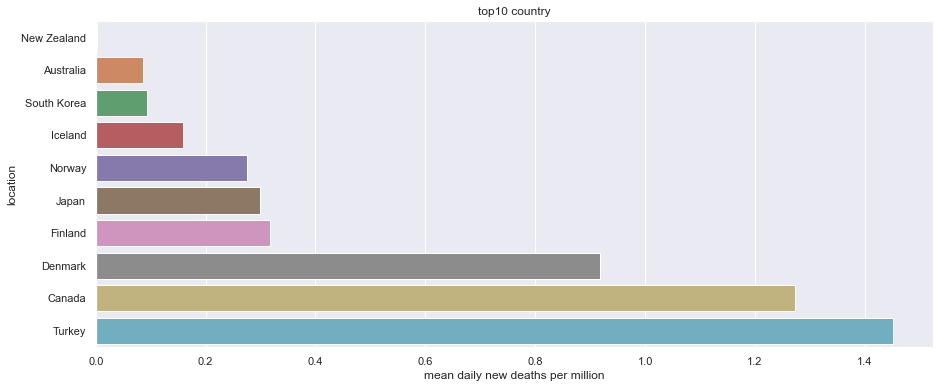

In [130]:
top10 = ndpm["2020Q3_2021Q2"].sort_values().iloc[:10].reset_index()
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("mean daily new deaths per million")
plt.title("top10 country")
plt.show()      

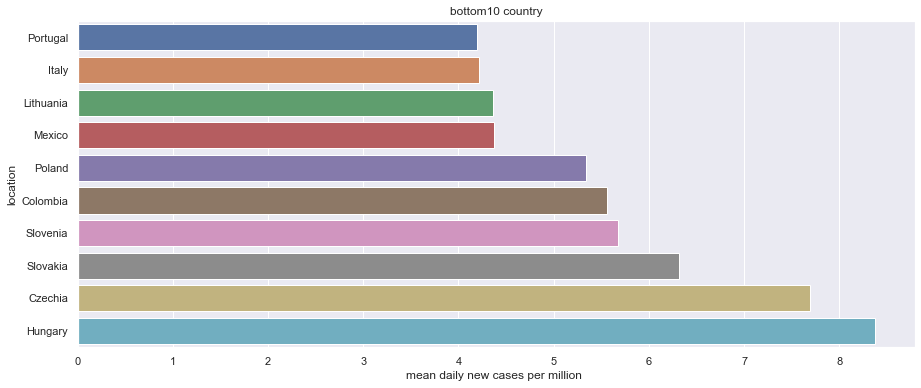

In [131]:
bottom10 = ndpm["2020Q3_2021Q2"].sort_values().iloc[27:].reset_index()
sns.barplot(data = bottom10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("mean daily new cases per million ")
plt.title("bottom10 country")
plt.show()       

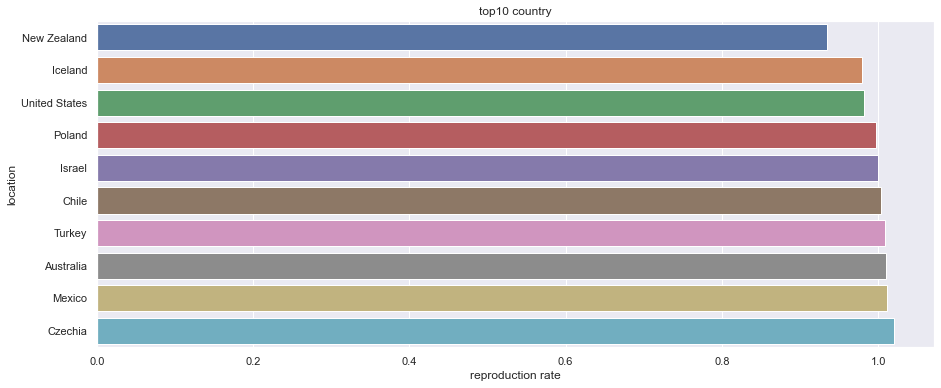

In [132]:
top10 = rr["2020Q3_2021Q2"].sort_values().iloc[:10].reset_index()
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("reproduction rate")
plt.title("top10 country")
plt.show()    

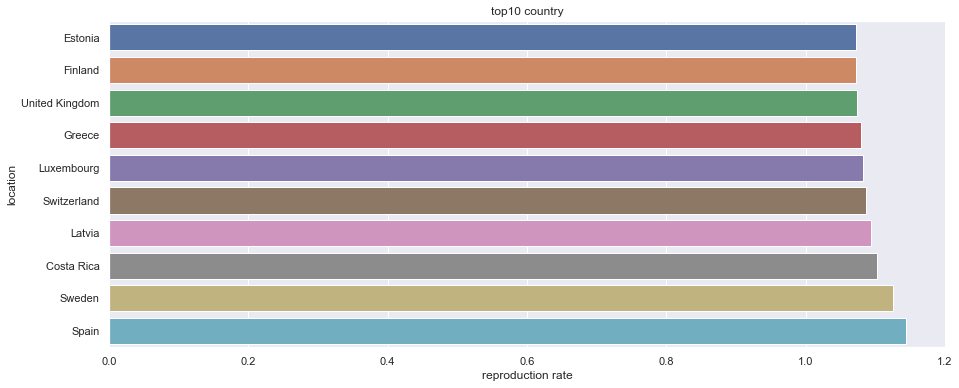

In [133]:
top10 = rr["2020Q3_2021Q2"].sort_values().iloc[27:].reset_index()
sns.barplot(data = top10,
            x = "2020Q3_2021Q2",
            y = "location",
            orient = "h")
plt.xlabel("reproduction rate")
plt.title("top10 country")
plt.show()    

In [134]:
top_rank

,cases,reproduction_rate,death
0,New Zealand,New Zealand,New Zealand
1,Australia,Iceland,Australia
2,South Korea,United States,South Korea
3,Japan,Poland,Iceland
4,Iceland,Israel,Norway
5,Finland,Chile,Japan
6,Mexico,Turkey,Finland
7,Norway,Australia,Denmark
8,Canada,Mexico,Canada
9,Greece,Czechia,Turkey


In [168]:
bottom_rank.to_csv("bottom.csv")

#### 2-2  경제/사회적 지표와 환산 관련지표 사이의 상관관계 분석 
* 코로나 이전과 이후의 gdp차이, 실업률, 인구당 확진자수, 인구당 사망자수, 재생산률간의 관계 비교 
* 큰 상관관계는 없음. 
* 그나마 재생산률과 실업률이 관계있음. 재생산률이 줄때 실업률도 줄어듬 


In [137]:
df = pd.read_csv("./DATA/WEO_data.csv")
# 경제성장률
gdp_data = df[df['Subject Descriptor'] == 'Gross domestic product, constant prices']
gdp_data = gdp_data[['Country', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].reset_index(drop = True)


# 실업률
emp_data = df[df['Subject Descriptor'] == 'Unemployment rate']
emp_data = emp_data[['Country', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].reset_index(drop = True)

In [138]:
years_2020 = ['2015', '2016', '2017', '2018', '2019']

# 5개년치 평균 & 표준편차
mean_2020 = gdp_data[years_2020].mean(axis = 1)
std_2020 = gdp_data[years_2020].std(axis = 1)

# 2020년 경제성장률 vs 최근 5개년 간의 평균 경제성장률
gdp_gap_2020 = (gdp_data['2020'] - mean_2020) / std_2020

df_2020 = pd.DataFrame({'Country': gdp_data['Country'],
             'Gap 2020': gdp_gap_2020})

normalized_gdp = df_2020.sort_values(by = ['Gap 2020'], axis = 0).reset_index(drop = True)

In [139]:
years_2020 = ['2015', '2016', '2017', '2018', '2019']

# 5개년치 평균 & 표준편차
mean_2020 = emp_data[years_2020].mean(axis = 1)
std_2020 = emp_data[years_2020].std(axis = 1)

# 2020년 실업률 vs 최근 5개년 간의 평균 실업률
emp_gap_2020 = (emp_data['2020'] - mean_2020) / std_2020

df_2020 = pd.DataFrame({'Country': emp_data['Country'],
             'Gap 2020': emp_gap_2020})

normalized_unem = df_2020.sort_values(by = ['Gap 2020'], axis = 0).reset_index(drop = True)

In [140]:
normalized_gdp["Country"].replace("Czech Republic","Czechia",inplace = True)
normalized_gdp["Country"].replace("Korea'","South Korea",inplace =True)
normalized_gdp["Country"].replace("Slovak Republic'",'Slovakia',inplace =True)

In [141]:
normalized_unem["Country"].replace("Czech Republic","Czechia",inplace = True)
normalized_unem["Country"].replace("Korea'","South Korea",inplace =True)
normalized_unem["Country"].replace("Slovak Republic'",'Slovakia',inplace =True)

In [142]:
normalized_gdp =normalized_gdp.set_index("Country")
normalized_unem = normalized_unem.set_index("Country")

In [143]:
merged = pd.merge(ncpm["2020Q3_2021Q2"],rr["2020Q3_2021Q2"],on = "location")
merged = pd.merge(merged,ndpm["2020Q3_2021Q2"],on = "location")
merged = pd.merge(merged,normalized_gdp, left_index = True, right_index = True, how ="inner")
merged = pd.merge(merged,normalized_unem, left_index = True, right_index = True, how ="inner")
merged.columns = ["cases","reproduction_rate","deaths","norm_gdp_growth","norm_unemp_rate"]
merged

,cases,reproduction_rate,deaths,norm_gdp_growth,norm_unemp_rate
Australia,2.425133,1.009941,0.085887,-13.764064,2.695416
Austria,192.469180,1.023313,3.041665,-12.868909,-0.022124
Belgium,241.777246,1.054740,3.640626,-28.413243,-1.038764
Canada,95.819030,1.022661,1.273540,-7.313137,5.396923
Chile,183.553715,1.004313,3.853079,-7.146601,9.178807
Colombia,223.246358,1.045697,5.561223,-12.308953,10.848427
Czechia,425.003260,1.020389,7.695324,-6.353198,-0.413847
Denmark,133.107408,1.069199,0.917793,-13.904324,-0.014433
Estonia,268.532951,1.071669,2.497124,-4.693739,1.307775
Finland,43.966877,1.072057,0.318059,-4.199693,-0.411127


<AxesSubplot:>

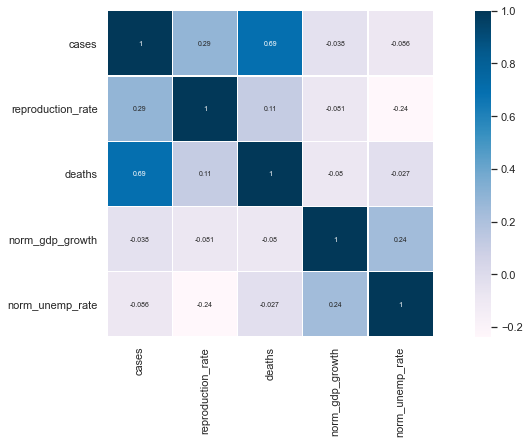

In [144]:
colormap = plt.cm.PuBu
sns.heatmap(merged.corr(),linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

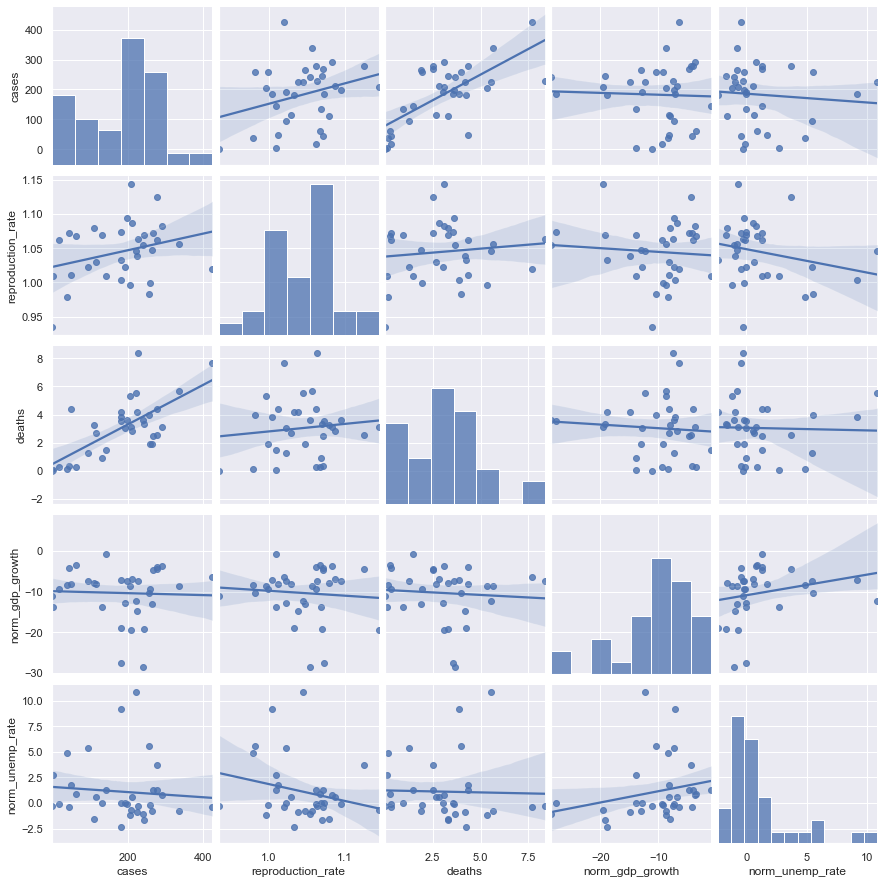

In [145]:
sns.pairplot(merged,kind="reg")
plt.show()

#### 2-3 국가별 경제적 타격 비교

In [146]:
# 2019 대비 2020 경제성장률 
gdp_data['2019'].mean() - gdp_data['2020'].mean()

6.689675675675675

In [147]:
# 2020년 기준 top10
top10_gdp = gdp_data.sort_values(by = ['2020'], axis = 0, ascending = False).reset_index(drop = True).iloc[:10]
top10_gdp

,Country,2015,2016,2017,2018,2019,2020,2021
0,Ireland,25.305,1.982,9.435,8.948,5.924,2.475,4.234
1,Turkey,6.084,3.323,7.502,2.959,0.917,1.794,6.042
2,Norway,1.967,1.072,2.323,1.119,0.852,-0.762,3.861
3,Lithuania,2.024,2.519,4.282,3.937,4.339,-0.823,3.169
4,Korea,2.809,2.947,3.160,2.907,2.039,-0.958,3.585
5,Luxembourg,4.305,4.574,1.801,3.111,2.298,-1.314,4.095
6,Israel,2.250,3.826,3.582,3.482,3.446,-2.377,4.991
7,Australia,2.321,2.728,2.413,2.844,1.946,-2.438,4.538
8,Poland,4.236,3.142,4.831,5.354,4.541,-2.723,3.467
9,Sweden,4.489,2.071,2.568,1.950,1.370,-2.818,3.060


In [148]:
import matplotlib.font_manager as fm

fm._rebuild()
sorted([f.name for f in fm.fontManager.ttflist if f.name.startswith("Nanum")])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumSquare_ac',
 'NanumSquare_ac',
 'NanumSquare_ac',
 'NanumSquare_ac']

In [149]:
plt.rcParams['font.family'] = 'NanumGothic'

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

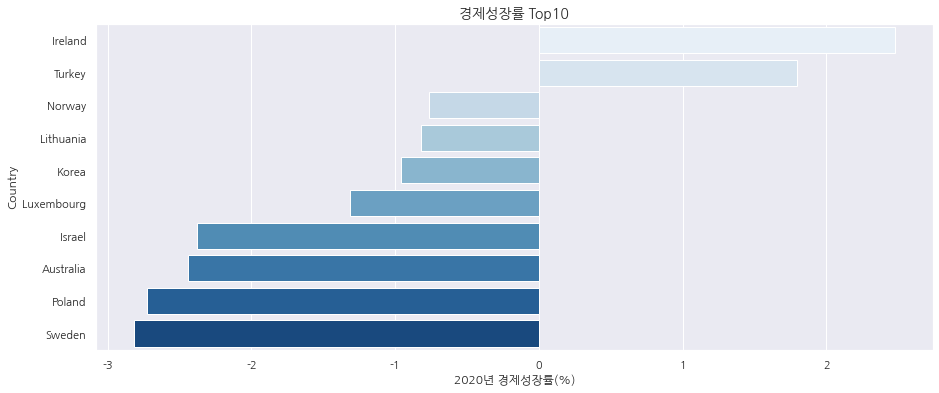

In [150]:
sns.barplot(data = top10_gdp,
            x = "2020",                                      #해당 데이터 칼럼 이름 
            y = "Country",                                           #국가명 
            orient = "h", 
           palette = "Blues")  #색깔지정 
plt.xlabel("2020년 경제성장률(%)")
plt.title("경제성장률 Top10",fontsize= 14)
plt.show()  

In [151]:
years_2020 = ['2015', '2016', '2017', '2018', '2019']

# 5개년치 평균 & 표준편차
mean_2020 = emp_data[years_2020].mean(axis = 1)
std_2020 = emp_data[years_2020].std(axis = 1)

In [152]:
# 2019 대비 2020 실업률
emp_data['2019'].mean() - emp_data['2020'].mean()

-1.1497837837837848

In [153]:
emp_data['2020'].mean()

6.951648648648649

In [154]:
# 2019년 대비 2020년
top10_emp = emp_data.sort_values(by = ['2020'], axis = 0, ascending = True).reset_index(drop = True).iloc[:10]
top10_emp

,Country,2015,2016,2017,2018,2019,2020,2021
0,Czech Republic,5.021,3.946,2.890,2.243,2.001,2.700,3.400
1,Japan,3.375,3.108,2.825,2.442,2.358,2.792,2.775
2,Switzerland,3.178,3.323,3.088,2.547,2.306,3.143,3.545
3,Poland,7.499,6.161,4.888,3.846,3.279,3.163,4.860
4,Netherlands,6.891,6.024,4.854,3.839,3.390,3.832,4.900
5,Korea,3.592,3.675,3.683,3.833,3.783,3.942,4.600
6,Hungary,6.626,4.971,4.041,3.596,3.309,4.115,3.795
7,Germany,4.633,4.133,3.758,3.400,3.150,4.183,4.448
8,Israel,5.275,4.800,4.225,4.000,3.825,4.300,5.000
9,Mexico,4.351,3.884,3.423,3.336,3.497,4.420,3.600


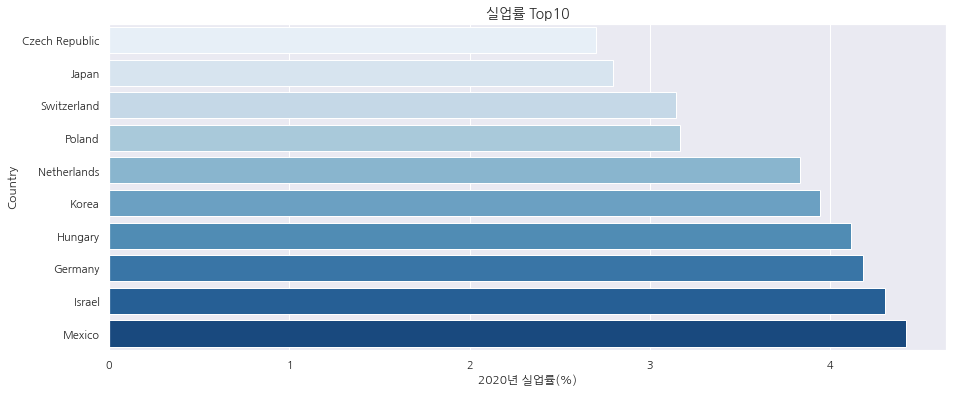

In [155]:
sns.barplot(data = top10_emp,
            x = "2020",                                      #해당 데이터 칼럼 이름 
            y = "Country",                                           #국가명 
            orient = "h", 
           palette = "Blues")                                         #색깔지정 
plt.xlabel("2020년 실업률(%)")
plt.title("실업률 Top10",fontsize= 14)
plt.show()  